# Machine Learning Project 2021
##### Davide Raffaelli
## Predicting taxonomic identity and genetic composition based on codon usage bias levels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
df = pd.read_csv("train.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop("SpeciesID", inplace=True, axis=1)
df.drop("SpeciesName", inplace=True, axis=1)
df
kingdoms = np.unique(df.iloc[:,0:1])

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,6686,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,inv,0,10060,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,bct,0,14031,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,bct,0,39839,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,vrt,1,5112,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,pln,0,1791,0.02289,0.02959,0.00614,0.02680,0.01452,0.02178,0.00558,...,0.00558,0.00893,0.01173,0.03071,0.01954,0.01787,0.02848,0.03127,0.00112,0.00000
10418,vrl,0,68352,0.02532,0.01557,0.00878,0.01185,0.01160,0.02654,0.00979,...,0.00477,0.01274,0.01008,0.02070,0.00726,0.02388,0.02233,0.01814,0.00025,0.00038
10419,bct,0,2292,0.01614,0.02618,0.00131,0.01003,0.02661,0.01658,0.00218,...,0.01702,0.00175,0.00567,0.02487,0.00000,0.02661,0.02618,0.01353,0.00000,0.00349
10420,pln,2,1022,0.00196,0.01761,0.04501,0.03131,0.02544,0.00978,0.01761,...,0.00391,0.01566,0.00391,0.02348,0.01957,0.03523,0.00978,0.00196,0.00000,0.00196


Let's check if there are some NAs

In [3]:
np.any(df.isna(), axis=1).sum()

0

We order by kingdom to have a nice plot.

In [4]:
df.sort_values(by = ["Kingdom"], inplace = True, ignore_index=True)

## Data visualization

In [47]:
from sklearn.feature_selection import mutual_info_classif

Choose colors

In [5]:
colors=sns.color_palette("tab10", 11)

Plot samples

<AxesSubplot:xlabel='Kingdom', ylabel='count'>

bct    2336
vrl    2265
pln    2018
vrt    1662
inv    1076
mam     458
phg     176
rod     172
pri     144
arc     101
plm      14
Name: Kingdom, dtype: int64

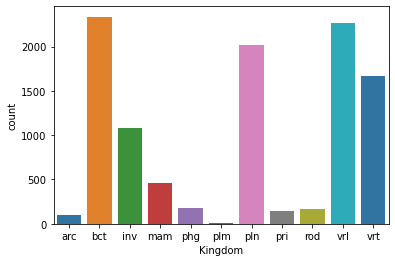

In [6]:
sns.countplot(x="Kingdom",data=df,palette=colors)
df["Kingdom"].value_counts()

<AxesSubplot:xlabel='DNAtype', ylabel='count'>

0     7407
1     2320
2      658
4       24
12       5
9        2
3        2
11       1
5        1
6        1
7        1
Name: DNAtype, dtype: int64

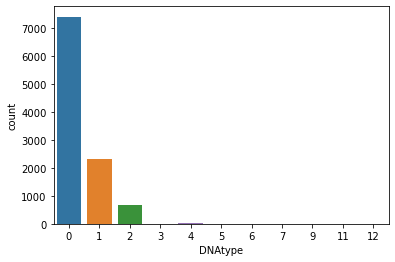

In [7]:
sns.countplot(x="DNAtype",data=df,palette=colors)
df["DNAtype"].value_counts()

As we can see, the outcomes are unbalanced, so we have to keep in mind this when we do our analysis.

In this project we want to use clustering and classification techniques so, since there are many classes with a really low number of samples, we want to exclude the samples that belong to classes with only one sample or with a very few samples (< 0.25% of the dataset).

Before this, it seems right to see for Kingdom = plm and DNAtype = 4 (the bigger classes of those we want to delete) the relative other outcome, in order to check if there is a link.

In [8]:
df[df["Kingdom"] == "plm"]
df[df["DNAtype"] == 4]

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
4147,plm,0,16716,0.00144,0.01669,0.01292,0.00592,0.01926,0.01890,0.00431,...,0.01017,0.00897,0.00514,0.03063,0.02339,0.04092,0.01496,0.02070,0.00024,0.00144
4148,plm,0,3727,0.02764,0.02522,0.00402,0.01690,0.01503,0.01288,0.00563,...,0.01207,0.00188,0.00241,0.02710,0.01959,0.02978,0.03112,0.03112,0.00054,0.00241
4149,plm,0,16204,0.01648,0.02586,0.00191,0.01568,0.01191,0.01247,0.00463,...,0.01574,0.00148,0.00284,0.01938,0.00876,0.03376,0.02826,0.02475,0.00062,0.00228
4150,plm,0,19535,0.01418,0.02032,0.00261,0.01582,0.01208,0.02846,0.00722,...,0.01188,0.00174,0.00333,0.02130,0.01003,0.02810,0.03609,0.00113,0.00082,0.00195
4151,plm,0,28138,0.01738,0.01628,0.01070,0.00597,0.01791,0.02001,0.00341,...,0.01308,0.00849,0.00569,0.03010,0.01781,0.03952,0.01809,0.02043,0.00036,0.00217
4152,plm,0,27831,0.01603,0.01700,0.01135,0.01085,0.01146,0.01976,0.00395,...,0.01649,0.00564,0.00546,0.02666,0.02084,0.03295,0.02436,0.01470,0.00040,0.00216
4153,plm,0,1976,0.01012,0.01113,0.00607,0.01164,0.01316,0.04757,0.00810,...,0.01974,0.00455,0.00455,0.01417,0.01721,0.03087,0.03947,0.00051,0.00051,0.00202
4154,plm,0,2205,0.01043,0.01859,0.01678,0.02177,0.02177,0.01859,0.00771,...,0.01270,0.00726,0.00771,0.03265,0.01633,0.03719,0.02857,0.02540,0.00136,0.00136
4155,plm,0,16835,0.00849,0.02726,0.00083,0.01129,0.00689,0.04021,0.00303,...,0.01699,0.00119,0.00350,0.01568,0.00422,0.01913,0.04164,0.00618,0.00065,0.00220
4156,plm,0,2873,0.01810,0.02680,0.00313,0.01880,0.01497,0.03272,0.00627,...,0.00905,0.00174,0.00104,0.02506,0.02123,0.03202,0.02993,0.02402,0.00070,0.00174


,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
1514,bct,4,1728,0.00000,0.01157,0.00810,0.01042,0.01562,0.02951,0.00463,...,0.00926,0.00347,0.00289,0.04514,0.02662,0.04919,0.02894,0.01794,0.00000,0.00174
3243,inv,4,1586,0.01955,0.00189,0.11412,0.00063,0.00946,0.00567,0.00378,...,0.00000,0.01765,0.00063,0.03342,0.02207,0.04035,0.00189,0.01513,0.00000,0.00189
3327,inv,4,1051,0.00571,0.00571,0.11323,0.00381,0.01047,0.00095,0.00761,...,0.00000,0.01808,0.00000,0.02759,0.00095,0.03520,0.00095,0.00000,0.00000,0.00285
4219,pln,4,1013,0.00592,0.01974,0.04936,0.03850,0.01876,0.01185,0.02468,...,0.01185,0.01974,0.00197,0.03554,0.01579,0.02764,0.01185,0.00395,0.00000,0.00000
4317,pln,4,3423,0.02658,0.02220,0.02658,0.00818,0.02249,0.00204,0.01636,...,0.00204,0.02045,0.00409,0.04703,0.00000,0.04090,0.01227,0.00000,0.00204,0.00000
4624,pln,4,1028,0.01362,0.02529,0.04280,0.03113,0.02918,0.00195,0.01946,...,0.01167,0.01751,0.00778,0.03307,0.00195,0.03307,0.00778,0.00973,0.00000,0.00000
4888,pln,4,1009,0.00496,0.02279,0.04856,0.03568,0.02279,0.01883,0.01982,...,0.00991,0.01883,0.00198,0.03370,0.01189,0.02577,0.01189,0.00198,0.00000,0.00000
4963,pln,4,1207,0.02651,0.01408,0.00746,0.01574,0.01326,0.01906,0.00994,...,0.00746,0.00994,0.01160,0.03148,0.02320,0.03728,0.01823,0.02237,0.00000,0.00166
4964,pln,4,15648,0.05100,0.02288,0.05956,0.00000,0.01809,0.04761,0.00588,...,0.00000,0.01840,0.00000,0.05087,0.01393,0.05521,0.00204,0.00000,0.00000,0.00000
5036,pln,4,1010,0.00198,0.02178,0.04158,0.03168,0.02178,0.01386,0.02178,...,0.00891,0.01584,0.00594,0.02772,0.09109,0.03465,0.00792,0.00198,0.00000,0.00000


As we can see the samples of plm kingdom type are of 0 DNAtype, which it doesn't seem strange since DNAtype 0 is more or less 2/3 of total database.

A more interesting information is that almost all samples with DNAtype = 4 are pln. Since the number of samples with DNAtype = 4 is < 0.25% of database, I decided to drop the samples of this class, but for future researches in which there are more data, it could be useful to inspect deeper this relation.

In [9]:
df = df[df["Kingdom"] != "plm"]
df = df[df["DNAtype"] <= 2]
df.reset_index(inplace = True, drop = True)
df["Kingdom"].value_counts()
df["DNAtype"].value_counts()

bct    2334
vrl    2265
pln    1992
vrt    1662
inv    1067
mam     458
phg     176
rod     172
pri     144
arc     101
Name: Kingdom, dtype: int64

0    7393
1    2320
2     658
Name: DNAtype, dtype: int64

As we can see the dataset contains a lot of data and, since my laptop is very cheap I cannot run some algorithm with the complete dataset. So we have to create a smaller dataset and use it for the most time and memory consuming algorithm.

In [48]:
fraction = 0.5
small_df_indexes = []
seed = 444
for kingdom in df["Kingdom"].unique() :
    np.random.seed(seed)
    seed = seed + 1
    small_df_indexes.extend(
        np.random.choice(df[df["Kingdom"] == kingdom].index.values,
                         size = int(round(df[df["Kingdom"] == kingdom].index.values.size * fraction)), 
                         replace = False))
small_df_indexes = np.sort(np.array(small_df_indexes))

Now we check if the data distribution of DNAtype of the small dataset is similar to the complete dataset. The distribution of Kingdom is the same because we use 60% of sample for each kingdom.

<AxesSubplot:xlabel='DNAtype', ylabel='count'>

0    0.497498
1    0.496983
2    0.537994
Name: DNAtype, dtype: float64

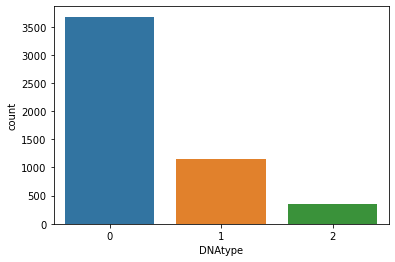

In [11]:
sns.countplot(x="DNAtype",data=df.iloc[small_df_indexes],palette=colors)

# print fraction of samples
df["DNAtype"].iloc[small_df_indexes].value_counts() / df["DNAtype"].value_counts()

As we can see the proportion is right after the sampling.

Correlation between covariates

<AxesSubplot:>

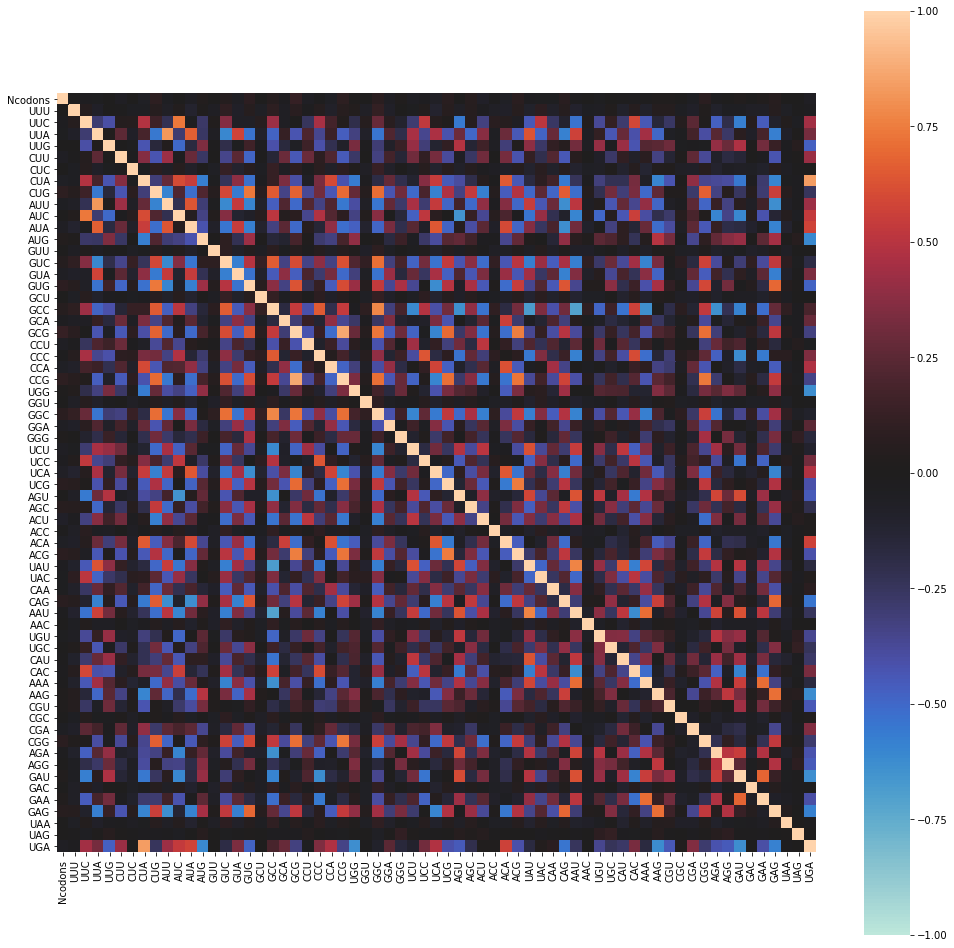

In [49]:
fig=plt.figure(figsize=(17,17))
cormat=df.iloc[:,2:].corr()
sns.heatmap(cormat,vmin=-1,vmax=1,square=True, cmap = sns.color_palette("icefire", as_cmap=True))

As we can see we have some covariates that are highly correlated, indicating that there can be collinearity. Now we want to know the pair of covariates that are most correlated.

In [50]:
cov_names = list(cormat)
cov_correlated = []
for r in range(len(cov_names)):
    for c in range(r+1,len(cov_names)):
        if cormat.iloc[r,c] > 0.65 or cormat.iloc[r,c] < -0.65:
            cov_correlated.append([cov_names[r],cov_names[c]])
print(cov_correlated)

[['UUC', 'AUC'], ['UUA', 'AUU'], ['UUA', 'AUA'], ['CUA', 'ACA'], ['CUA', 'UGA'], ['CUG', 'GUG'], ['CUG', 'GCG'], ['CUG', 'CCG'], ['CUG', 'GGC'], ['CUG', 'CAG'], ['CUG', 'CGG'], ['AUC', 'AGU'], ['GUC', 'GCC'], ['GUC', 'GGC'], ['GUG', 'GAG'], ['GCC', 'GGC'], ['GCC', 'UAU'], ['GCC', 'AAU'], ['GCG', 'CCG'], ['GCG', 'GGC'], ['GCG', 'UCG'], ['GCG', 'ACG'], ['GCG', 'CGG'], ['CCG', 'GGC'], ['CCG', 'UCG'], ['CCG', 'ACG'], ['CCG', 'CGG'], ['UCG', 'ACG'], ['UAU', 'AAU'], ['CAG', 'GAG'], ['AAU', 'AAA'], ['AAA', 'GAA'], ['AAG', 'GAG'], ['GAU', 'GAA']]


Now we want to see how much the covariates vary.

Plot means

Text(0.5, 1.0, 'Dot Plot for Protein Mean')

Text(0.5, 0, 'Mean')

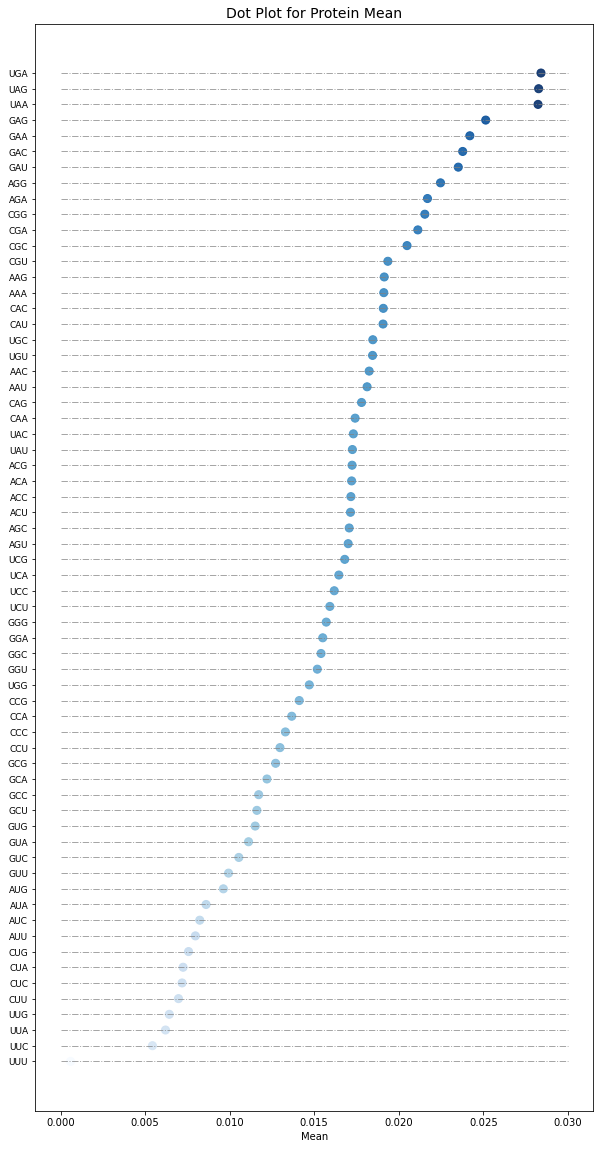

In [14]:
avgs = df.iloc[:,3:].mean(axis = 0)
avgs.sort_values(ascending = True, inplace = True)

fig, ax = plt.subplots(figsize=(10,20))

ax.hlines(y=list(df)[3:], xmin = 0,xmax = 0.03,color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=list(df)[3:], x=avgs.values, s=65, c=avgs.values, cmap='Blues', alpha=0.9)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Protein Mean', fontdict={'size':14})
ax.set_xlabel('Mean')
ax.tick_params(axis='y', which='major', labelsize=9)

Plot distributions

[Text(0.5, 0, 'measure'), Text(0, 0.5, 'protein')]

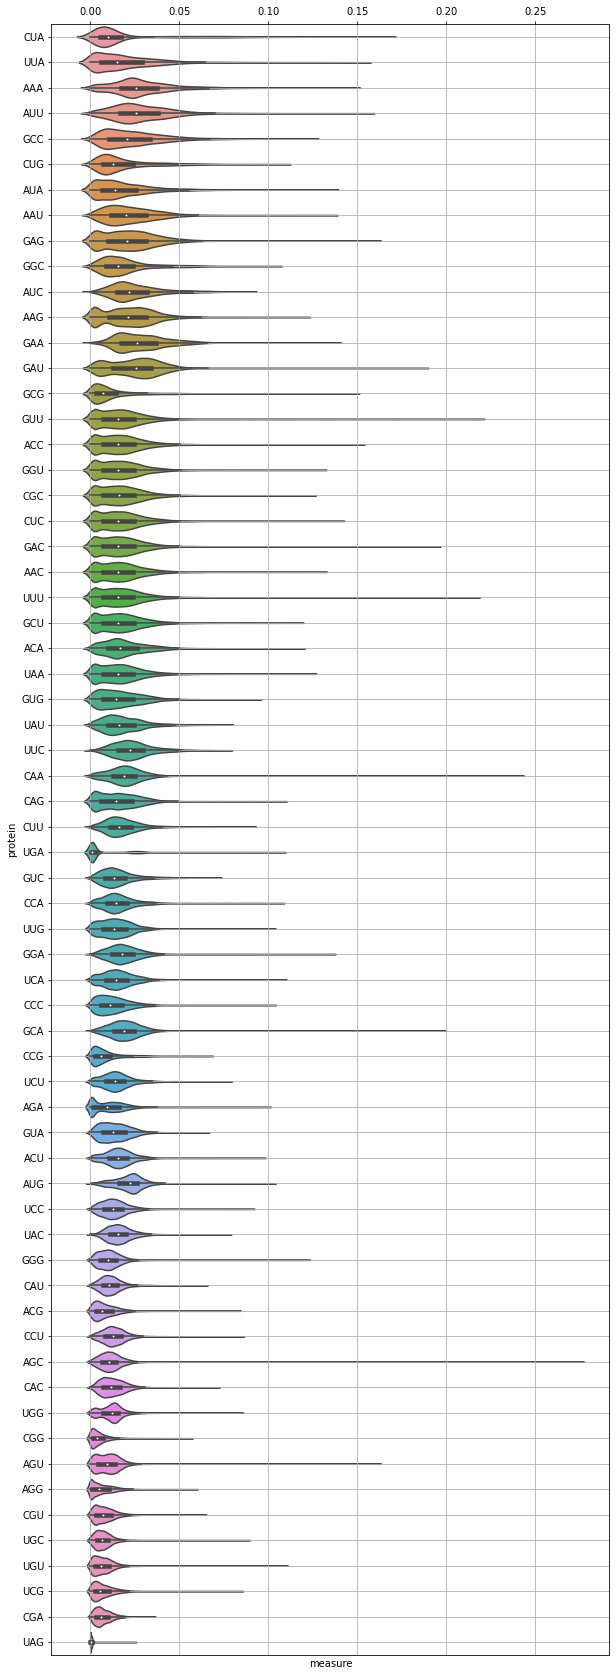

In [15]:
variances = df.iloc[:,3:].var()
variances.sort_values(ascending = False, inplace = True)

fig=plt.figure(figsize=(10,30))
a=sns.violinplot(data=df.iloc[:,3:],orient="h",scale="count", order=variances.index.tolist())
a.set(xlabel='measure', ylabel='protein')
a.xaxis.set_ticks_position('top')
plt.grid()

As we can see we have to standardize the data if we want to use methods like PCA, even if we exclude Ncodons

With the mutual info criteria we order the covariates in order of importance. First for all classes, then for each class.

In [51]:
X = df.iloc[:,2:]
mi_index = mutual_info_classif(X, df["Kingdom"])
#we get a sorted index of this list from highest to lowest
imp_cov_king = mi_index.argsort()[::-1]
#we get a list of proteins sorted by highest MI
imp_cov_king=list(X.columns[imp_cov_king])
#we check the first 20 proteins
print(imp_cov_king)

['CUA', 'AGG', 'UGA', 'AGA', 'AAG', 'GAU', 'UGU', 'ACA', 'GCG', 'GAG', 'CAG', 'CGU', 'CCA', 'AUA', 'AAA', 'UGG', 'AUC', 'GCC', 'CCG', 'GGC', 'Ncodons', 'UUG', 'GAA', 'ACG', 'UCG', 'AGU', 'UCA', 'GUG', 'AUG', 'UUC', 'UUA', 'UCU', 'CGG', 'AAU', 'CUU', 'CUG', 'UGC', 'CCC', 'CGA', 'AUU', 'GGA', 'CAU', 'CAA', 'CAC', 'UAU', 'UCC', 'CCU', 'ACU', 'AGC', 'GUA', 'GUC', 'GCA', 'GGG', 'UAC', 'GCU', 'UUU', 'GUU', 'CUC', 'UAG', 'UAA', 'CGC', 'ACC', 'GGU', 'GAC', 'AAC']


In [52]:
mi_index = mutual_info_classif(X, df["DNAtype"])
#we get a sorted index of this list from highest to lowest
imp_cov_dnat = mi_index.argsort()[::-1]
#we get a list of proteins sorted by highest MI
imp_cov_dnat=list(X.columns[imp_cov_dnat])
#we check the first 20 proteins
print(imp_cov_dnat)

['UGA', 'AAG', 'GAG', 'CUA', 'CAG', 'AGG', 'UGG', 'GUG', 'AUA', 'GAU', 'AGA', 'GCG', 'ACG', 'AUG', 'CGU', 'CCG', 'ACA', 'UUA', 'AUU', 'UUG', 'UCG', 'CGA', 'GAA', 'AGC', 'AGU', 'AAA', 'GUA', 'UGC', 'UCA', 'AUC', 'GGC', 'CGG', 'CUU', 'Ncodons', 'UGU', 'CCA', 'GCC', 'CUG', 'UUC', 'CAU', 'GUC', 'CAC', 'UAU', 'UCU', 'AAU', 'CCC', 'GCA', 'CAA', 'GGA', 'UAC', 'UCC', 'GGG', 'GCU', 'ACU', 'GUU', 'ACC', 'CCU', 'CUC', 'AAC', 'UAA', 'GGU', 'CGC', 'UUU', 'GAC', 'UAG']


It seems that the significative covariates for one outcome tend to be significative even for the other outcome. This means that if we want to build models that will give us information about Kingdom performing feature selection we expect that the selected covaraites are more or less the sames if we want to build model for DNAtype.

Now we see which ones between the correlated covariates are less important, in order to understand which variables are those that we expect that don't bring particular information.

In [53]:
less_imp_corr_covs = set()
for pair in cov_correlated:
    if (imp_cov_king.index(pair[0]) + imp_cov_dnat.index(pair[0]) <= 
        imp_cov_king.index(pair[1]) + imp_cov_dnat.index(pair[1])) :
        less_imp_corr_covs.add(pair[1])
    else :
        less_imp_corr_covs.add(pair[0])

print(less_imp_corr_covs)

{'GUG', 'GGC', 'GCC', 'CUA', 'UUA', 'CAG', 'ACA', 'CGG', 'ACG', 'AGU', 'UAU', 'UUC', 'AUU', 'AAU', 'UCG', 'GUC', 'GAA', 'GAG', 'CUG', 'CCG'}


## Clustering

### Hierarchical

The first method of clustering that we use to study if there are structures in the data that allow samples from different classes (both DNA type and Kingdom) to be easily identified is the hierarchical clustering.

Since we want to know if the DNA type or the Kingdom can be identified we know the number of clusters that we want to obtain, so there is no particular reason to use the hierarchical clustering because when we know the number of clusters we expect that this method will give us poorer results compared to other clustering techniques. However, here we use this method anyway, just to check the differences between the results of this method compared to the others.

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [24]:
def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax

We want now to use standardize data, since Ncodons measurement is not comparable with the frequencies.

In [25]:
X = (X-X.mean())/ X.std()
X.head()

,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,-0.091520,-1.194786,-0.024097,-0.959642,-1.113869,-1.395348,-0.451562,-0.761846,0.570777,-1.394567,...,1.121852,-1.036742,-0.878949,-0.885488,4.681780,-0.306781,2.526486,-1.230035,0.086298,-0.464087
1,0.688553,1.361262,0.008392,-0.797033,-0.777320,-0.233779,-0.122110,0.044622,0.701405,-1.137675,...,-0.028053,0.171573,7.211416,-0.726902,-0.869218,-1.192637,2.911963,-0.959106,1.402765,-0.519856
2,-0.103744,0.402649,-0.597778,0.633923,-0.016849,-0.120664,0.806073,-0.100517,-0.756066,-0.038333,...,-0.728062,1.006578,0.119029,0.239029,-0.924223,1.446052,-0.125512,0.137732,-0.098660,-0.397740
3,0.753202,-1.181113,-0.794419,-0.172810,0.011197,0.249099,0.234421,-0.013188,-0.304311,-0.659774,...,-0.021953,2.009049,2.288889,-0.451539,-0.139081,-0.343838,1.653456,0.339192,0.728212,-0.500625
4,0.767533,-1.219853,0.299079,-0.183003,0.058659,0.337500,0.096021,-0.027128,-0.475458,-0.406869,...,-0.732637,0.801897,4.718819,0.239029,1.651223,0.510555,2.077211,0.260460,0.064539,-0.434279


Text(0.5, 1.0, 'single')

Text(0.5, 1.0, 'average')

Text(0.5, 1.0, 'complete')

Text(0.5, 1.0, 'ward')

Text(0.5, 1.0, 'centroid')

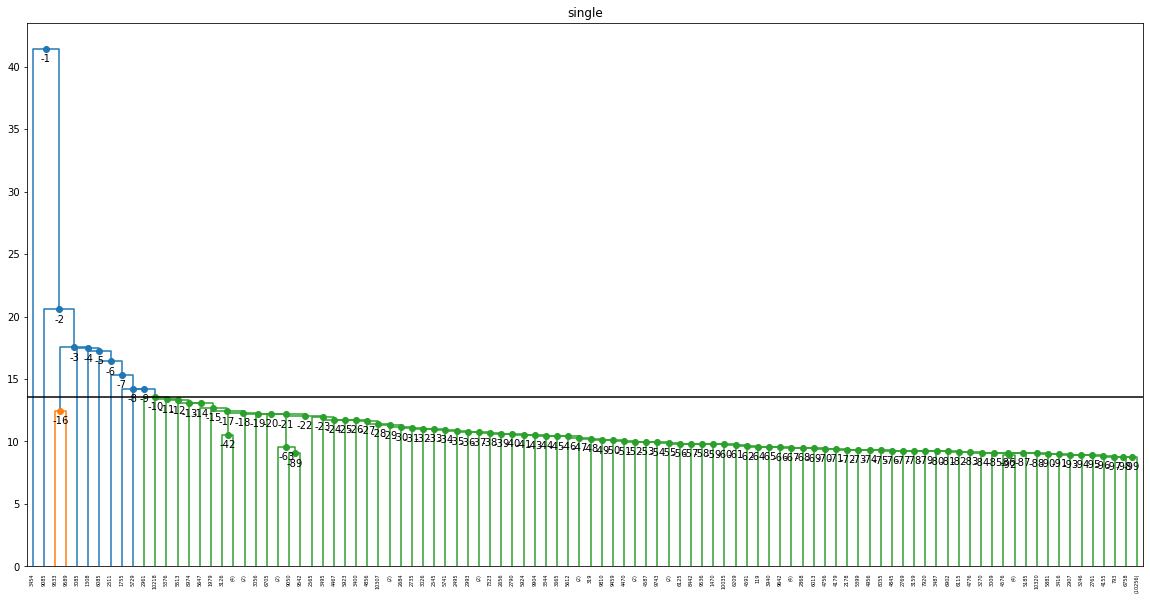

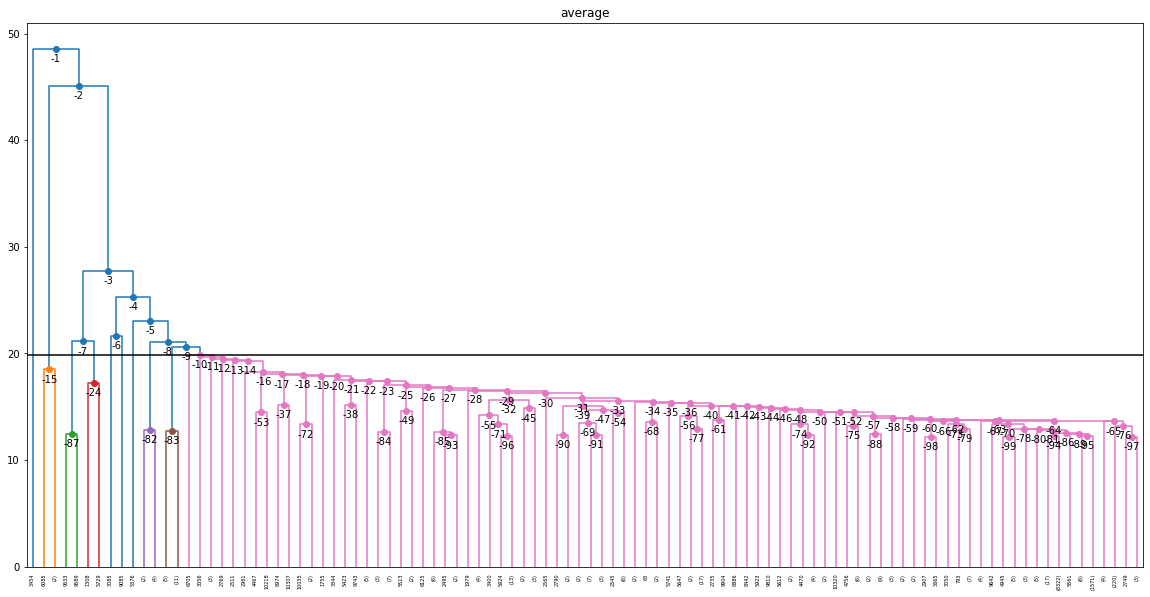

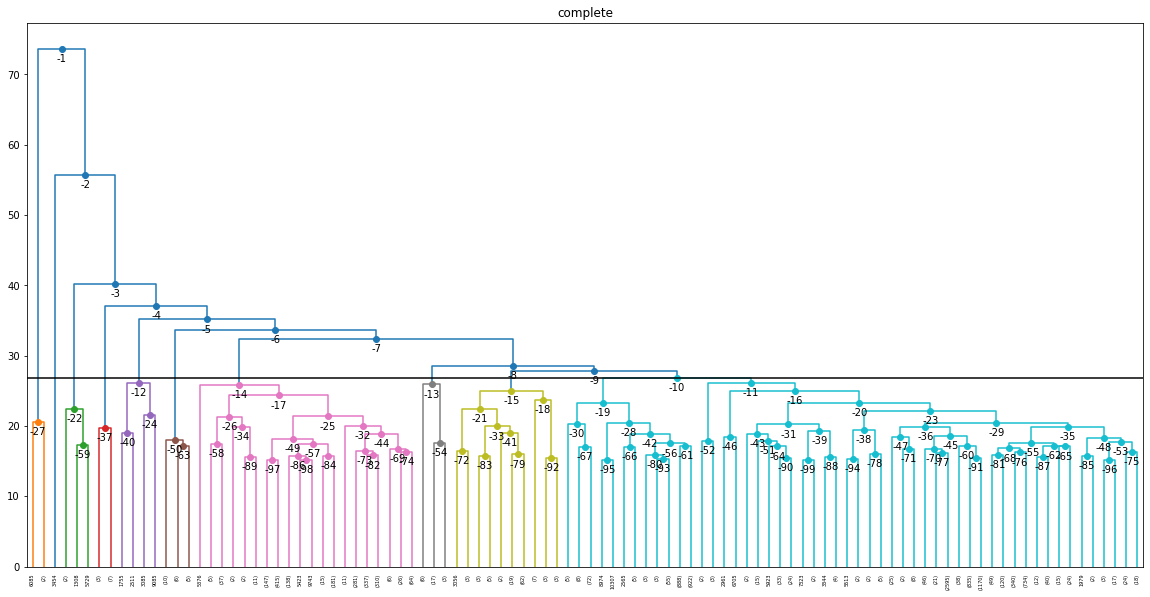

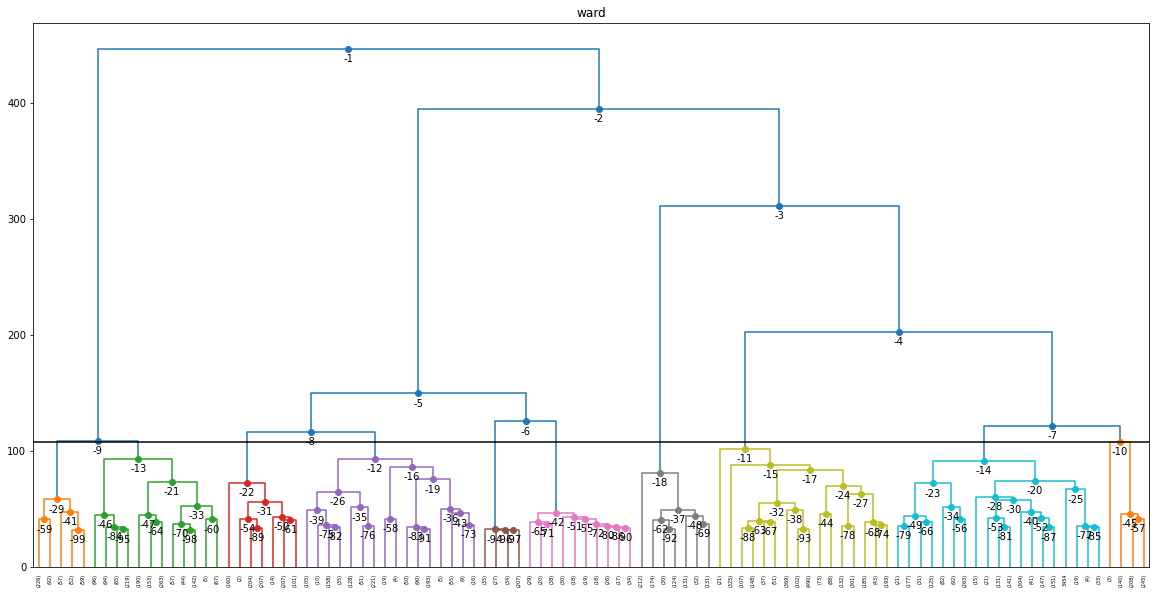

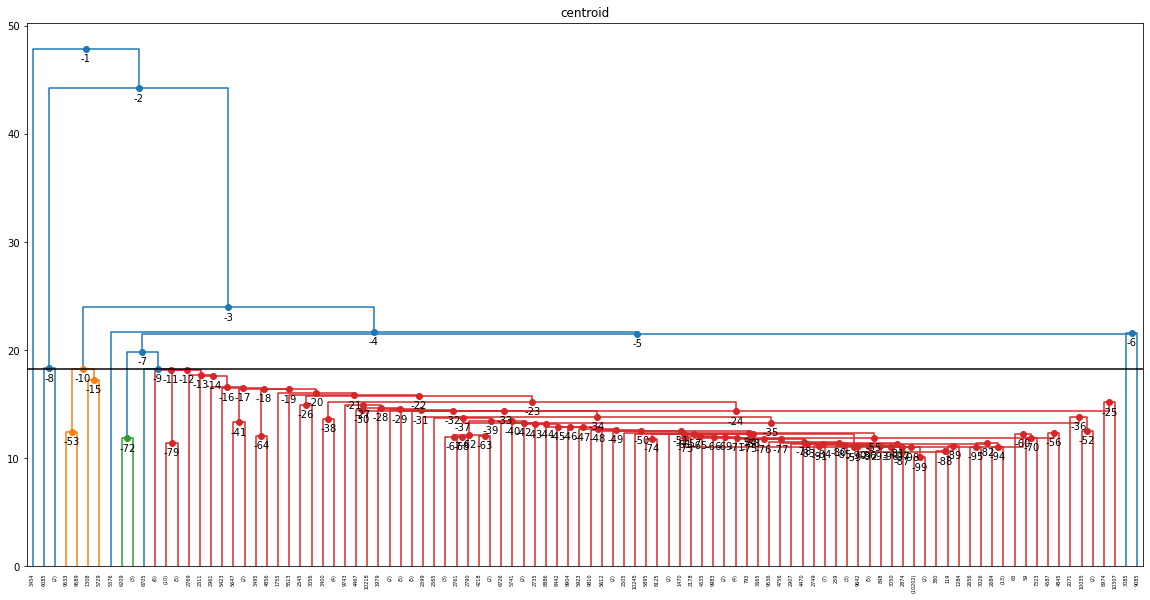

In [26]:
## Dendograms Euclidean Distance
methods = ['single', 'average', 'complete','ward', 'centroid']

for method in methods:
    L = linkage(X, metric='euclidean', method=method)
    fig, ax = plot_dendrogram(Z=L, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=10)

    ax.set_title(method)

The method that seems to give the best result is the ward.

In order to evaluate the goodness of the results, we write some function that calculate the typical indexes for assess GOF of clustering.

Correlation and similarity martix

In [28]:
def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)
        # Compute combinations of these indices
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0].reshape(-1), idx[1].reshape(-1)] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = (inc @ sim.T)
    return corr[0,0]

def sorted_sim(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_mat(sim, y_pred):
    sim = sorted_sim(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks

Internal indexes

In [30]:
def wss(X, y_pred, metric):
    ncluster = np.unique(y_pred).shape[0]
    err = 0
    for k in range(ncluster):
        # All the points of this cluster
        X_k = X[y_pred == k]
        # Distances of all points within the cluster
        dist_mat = pairwise_distances(X_k, metric=metric)
        # Select the lower triangular part of the matrix
        triu_idx = np.tril_indices(dist_mat.shape[0], k=1)
        err += (dist_mat[triu_idx] ** 2).sum()
    
    return err

def bss(X, y_pred, metric):
    ncluster = np.unique(y_pred).shape[0]
    # Sort the distance matrix (as we did for the simiarity)
    dist_mat = pairwise_distances(X, metric=metric) ** 2
    dist_mat = sorted_sim(dist_mat, y_predict)
    y_sort = np.sort(y_pred)
    
    err = 0
    for k in range(ncluster):
        kidx = np.where(y_sort == k)[0]
        start, end = kidx[0], kidx[-1]
        err += dist_mat[start:end, end+1:].sum()
    
    return err

External indexes

In [31]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

After defining the indexes, we calculate them for each linkage with euclidian and manhattan distance in order to assert which method is the best.

In [33]:
methods = ['single', 'average', 'complete','ward']

for method in methods:
    hierarchical_model_k = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage=method)
    hierarchical_model_t = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage=method)
    y_pred_k =  hierarchical_model_k.fit_predict(X) 
    y_pred_t =  hierarchical_model_t.fit_predict(X)
    print("METHOD : ", method)
    print("Purity Kingdom ", tot_purity(y_pred_k, df["Kingdom"]))
    print("Purity DNA type ", tot_purity(y_pred_t, df["DNAtype"]))
    print("Avg Silhoutte for Kingdom : ", silhouette_score(X, y_pred_k, metric='euclidean'))
    print("Avg Silhoutte for DNAtype : ", silhouette_score(X, y_pred_t, metric='euclidean'))
    print()

METHOD :  single
Purity Kingdom  0.22582200365516822
Purity DNA type  0.7128531481991004
Avg Silhoutte for Kingdom :  0.3923309734173948
Avg Silhoutte for DNAtype :  0.5902834087353932

METHOD :  average
Purity Kingdom  0.22784688071732814
Purity DNA type  0.7128531481991004
Avg Silhoutte for Kingdom :  0.4619005661959851
Avg Silhoutte for DNAtype :  0.758955005624776

METHOD :  complete
Purity Kingdom  0.31115610837352026
Purity DNA type  0.7128531481991004
Avg Silhoutte for Kingdom :  0.15396925613033383
Avg Silhoutte for DNAtype :  0.758955005624776

METHOD :  ward
Purity Kingdom  0.5583839552531914
Purity DNA type  0.8934528975001637
Avg Silhoutte for Kingdom :  0.06729420301188586
Avg Silhoutte for DNAtype :  0.17706643847796585



In [34]:
methods = ['single', 'average', 'complete']

for method in methods:
    hierarchical_model_k = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='manhattan', linkage=method)
    hierarchical_model_t = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='manhattan', linkage=method)
    y_pred_k =  hierarchical_model_k.fit_predict(X) 
    y_pred_t =  hierarchical_model_t.fit_predict(X)
    print("METHOD : ", method)
    print("Purity Kingdom ", tot_purity(y_pred_k, df["Kingdom"]))
    print("Purity DNA type ", tot_purity(y_pred_t, df["DNAtype"]))
    print("Avg Silhoutte for Kingdom : ", silhouette_score(X, y_pred_k, metric='manhattan'))
    print("Avg Silhoutte for DNAtype : ", silhouette_score(X, y_pred_t, metric='manhattan'))
    print()

METHOD :  single
Purity Kingdom  0.22611127180674467
Purity DNA type  0.7128531481991004
Avg Silhoutte for Kingdom :  0.27143572494891227
Avg Silhoutte for DNAtype :  0.4018606801252451

METHOD :  average
Purity Kingdom  0.22678623082821447
Purity DNA type  0.7128531481991004
Avg Silhoutte for Kingdom :  0.24878399896097317
Avg Silhoutte for DNAtype :  0.4183457306828545

METHOD :  complete
Purity Kingdom  0.37672355606353775
Purity DNA type  0.712853148199287
Avg Silhoutte for Kingdom :  0.13797822758664077
Avg Silhoutte for DNAtype :  0.17340698143262911



As we can see, it seems that the DNAtype classes can be more easily identified, using those covariates, than the Kingdom classes.

We now print the similarity matrix for the best result. The best results  in term of purity are those of euclidian distance with ward linkage, while in term of silouette score is the euclidian average.

Since plot the complete similarity matrix is too onerous, we plot the similarity matrix of small dataset, with the clustering calculated on complete dataset. 

In [ ]:
sim = similarity_mat(X.iloc[small_df_indexes], 'euclidean')

#Kingdom
hierarchical_model = AgglomerativeClustering(n_clusters=10, 
                            distance_threshold=None, 
                            affinity='euclidean', linkage="ward")
y_pred =  hierarchical_model.fit_predict(X)
plot_sorted_mat(sim, y_pred[small_df_indexes])

#DNAtype
hierarchical_model = AgglomerativeClustering(n_clusters=3, 
                            distance_threshold=None, 
                            affinity='euclidean', linkage="ward")
y_pred =  hierarchical_model.fit_predict(X)
plot_sorted_mat(sim, y_pred[small_df_indexes])

As we can see the results are not very good so we try with other clustering techniques.

### Kmeans

Now we use Kmeans and Kmeans++ (which is a version ...). We expect that those two algorithms will give us better results than hierarchical clustering, because we have to provide to Kmeans the number of clusters that we want to obtain.

In [37]:
# Kmeans
model = KMeans(n_clusters=10, init='random', random_state=0)             
print("Random Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X), df["Kingdom"]))
print("Avg Silhoutte Random Kmeans for Kingdom: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))
print()

model = KMeans(n_clusters=3, init='random', random_state=0)             
print("Random Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X), df["DNAtype"]))
print("Avg Silhoutte Random Kmeans for DNAtype: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))

Random Kmeans purity for Kingdom:  0.6008099508180748
Avg Silhoutte Random Kmeans for Kingdom:  0.08202733952464177

Random Kmeans purity for DNAtype:  0.8949956609750311
Avg Silhoutte Random Kmeans for DNAtype:  0.20974946041528397


In [38]:
# Kmeans++
model = KMeans(n_clusters=10, init='k-means++', random_state=0)             
print("Random Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X), df["Kingdom"]))
print("Avg Silhoutte Random Kmeans for Kingdom: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))
print()

model = KMeans(n_clusters=3, init='k-means++', random_state=0)             
print("Random Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X), df["DNAtype"]))
print("Avg Silhoutte Random Kmeans for DNAtype: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))

Random Kmeans purity for Kingdom:  0.6014849098383392
Avg Silhoutte Random Kmeans for Kingdom:  0.08140181187098965

Random Kmeans purity for DNAtype:  0.8949956609750314
Avg Silhoutte Random Kmeans for DNAtype:  0.20966676828883915


In [ ]:
# Kmeans with hierarchical clustering to select initial centroids
hier_model = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X)
centroids = np.stack([X[y_predict == k].mean(0) for k in range(10)])
model = KMeans(n_clusters=10, init=centroids, n_init=1, random_state=0)
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))
print()

hier_model = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X)          
centroids = np.stack([X[y_predict == k].mean(0) for k in range(3)])
model = KMeans(n_clusters=3, init=centroids, n_init=1, random_state=0)
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))
print()


As we expected, the purity for Kmeans and Kmeans++ are greater. We now see the similarity matrix for Kmeans.

In [ ]:
model = KMeans(n_clusters=10, init='random', random_state=0)             
y_pred = model.fit_predict(X)
plot_sorted_mat(sim, y_pred[small_df_indexes])

model = KMeans(n_clusters=3, init='random', random_state=0)             
y_pred = model.fit_predict(X)
plot_sorted_mat(sim, y_pred[small_df_indexes])

### DBSCAN

DBSCAN is a very powerful algorithm for clustering based on the concept of density and connectivity. Its parameters are radius, called eps, and the number of neighbors (MinPts). By using purity as a metric we can select the combination of these two hyperparameters, in order to maximize the metric.

Since this research is very time consuming we use the small dataset

In [ ]:
def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

In [7]:
params = {'eps': [4,7,10], 'min_samples': [1,3,5]}
cv = GridSearchCV(DBSCAN(), params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X.iloc[small_df_indexes], df["Kingdom"].iloc[small_df_indexes])

print(cv.best_params_)
print("CV score",
      tot_purity(cv.best_estimator_.fit_predict(X.iloc[small_df_indexes]), df["Kingdom"].iloc[small_df_indexes]))

print("Number of outliers", (cv.best_estimator_.fit_predict(X.iloc[small_df_indexes]) == -1).sum())
ids, counts = np.unique(cv.best_estimator_.fit_predict(X.iloc[small_df_indexes]), return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids, index=['']))

NameError: name 'tot_purity' is not defined

As we can see there are some points classified as noise and the algorithm found 7 cluster which is a middle ground between the number of DNAtypes and the number of Kingdoms, so it isn't informative.

### Kmeans with dimensionality reduction

Since we saw that Kmeans and Kmeans++ are the methods that work better, we try to use some dimensionality reduction techniques before apply those two methods, in order to check if using less features can increase clustering results.

#### PCA

PCA transforms the features into a new set of features orthogonal to each other, so that the first features capture the most variability of the data. Then we select the k most significant features and run Kmeans only with them.

In [ ]:
pca = PCA()
X_pca = pca.fit(X)
X_prj = pca.fit_transform(X)
fig=plt.figure(figsize=(20,3))
plt.scatter(x=np.arange(1,66),y=X_pca.explained_variance_ratio_,cmap="magma",c=np.arange(1,66))
plt.grid()
plt.xlabel("principal components")
plt.ylabel("explained variance ratio")

As we can see the elbow in the elbow plot is around 3 and 4, and most of variance can be explained by the first 10 features. However, in order to not cut off too much of the variance, we will use the first 15 features.

In [ ]:
keep=15

# Kmeans
model = KMeans(n_clusters=10, init='random', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
print("KINGDOM")
print("Kmeans purity on 15 PCs:", tot_purity(y_predict_kpca, df["Kingdom"]))
print("Avg Silhoutte Random Kmeans on 15 PCs: ",
      silhouette_score(X_prj[:,0:keep], y_predict_kpca, metric='euclidean'))

model = KMeans(n_clusters=3, init='random', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
print("DNATYPE")
print("Kmeans purity on 15 PCs:", tot_purity(y_predict_kpca, df["DNAtype"]))
print("Avg Silhoutte Random Kmeans on 15 PCs: ",
      silhouette_score(X_prj[:,0:keep], y_predict_kpca, metric='euclidean'))

In [ ]:
# Kmeans++
model = KMeans(n_clusters=10, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
print("KINGDOM")
print("Kmeans++ purity on 15 PCs:", tot_purity(y_predict_kpca, df["Kingdom"]))
print("Avg Silhoutte Kmeans++ on 15 PCs: ",
      silhouette_score(X_prj[:,0:keep], y_predict_kpca, metric='euclidean'))
print()

model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
print("DNATYPE")
print("Kmeans++ purity on 15 PCs:", tot_purity(y_predict_kpca, df["DNAtype"]))
print("Avg Silhoutte Kmeans++ on 15 PCs: ",
      silhouette_score(X_prj[:,0:keep], y_predict_kpca, metric='euclidean'))

In [ ]:
# Kmeans + hierarchical clustering
hier_model = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X_prj[:,0:keep])
centroids = np.stack([X_prj[y_predict == k, 0:keep].mean(0) for k in range(10)])
model = KMeans(n_clusters=10, init=centroids, n_init=1, random_state=0)
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X_prj[:,0:keep]), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X_prj[:,0:keep], model.fit_predict(X_prj[:,0:keep]), metric='euclidean'))
print()

hier_model = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X_prj[:,0:keep])          
centroids = np.stack([X_prj[y_predict == k, 0:keep].mean(0) for k in range(3)])
model = KMeans(n_clusters=3, init=centroids, n_init=1, random_state=0)
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X_prj[:,0:keep]), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X_prj[:,0:keep], model.fit_predict(X_prj[:,0:keep]), metric='euclidean'))
print()


At the moment, it seems that using only 15 principal component with Kmeans++ is the best choice.

In [ ]:
model = KMeans(n_clusters=10, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
plot_sorted_mat(sim, y_predict_kpca[small_df_indexes])
model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
plot_sorted_mat(sim, y_predict_kpca[small_df_indexes])

#### Remove least significative correlated features

In [ ]:
X_less = X.drop(less_imp_corr_covs, axis = 1)

In [ ]:
# Kmeans
model = KMeans(n_clusters=10, init='random', random_state=0)
print("KINGDOM")
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X_less), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))
print()
model = KMeans(n_clusters=3, init='random', random_state=0)
print("DNATYPE")
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X_less), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))

In [ ]:
# Kmeans++
model = KMeans(n_clusters=10, init='k-means++', random_state=0)  
print("KINGDOM")
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X_less), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))
print()
model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
print("DNATYPE")
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X_less), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))

In [ ]:
# Kmeans + hierarchical clustering
hier_model = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X_less)
centroids = np.stack([X_less[y_predict == k].mean(0) for k in range(10)])
model = KMeans(n_clusters=10, init=centroids, n_init=1, random_state=0)
print("KINGDOM")
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X_less), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))
print()

hier_model = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X_less)          
centroids = np.stack([X_less[y_predict == k].mean(0) for k in range(3)])
model = KMeans(n_clusters=3, init=centroids, n_init=1, random_state=0)
print("DNATYPE")
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X_less), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))

The best result of these are given by Kmeans++.

In [ ]:
model = KMeans(n_clusters=10, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_less)
plot_sorted_mat(sim, y_predict_kpca[small_df_indexes])
model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_less)
plot_sorted_mat(sim, y_predict_kpca[small_df_indexes])

### Conclusion

In terms of silhoutte, the best results are from Kmeans(++) with PCA, while in term of purity Kmeans(++) without the less important covariates found in the initial analysis. As we can see it seems that these covariates can be more useful to find the DNAtype respect to find the Kingdom.

However has we can see from the similarity matrixes these results are not particularly good.

## Classification

We want to train a classificator in order to classify organisms into the 11 Kingdom classes. Since the request is to classify all the 11 Kingdom, we use the full dataset give at the start because we have to classify even the Kingdom with very few samples.

Since the features AGA and ACA are not present in test dataset, we remove them from train dataset.

In [17]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [3]:
df = pd.read_csv("train.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop("SpeciesID", inplace=True, axis=1)
df.drop("SpeciesName", inplace=True, axis=1)
df.drop("AGA", inplace=True, axis=1)
df.drop("ACA", inplace=True, axis=1)

df_test = pd.read_csv("test.csv")
df_test.drop('Unnamed: 0', inplace=True, axis=1)
df_test.drop("SpeciesID", inplace=True, axis=1)
df_test.drop("SpeciesName", inplace=True, axis=1)
X_test = df_test.drop(["Kingdom", "DNAtype"], axis = 1)
y_test = df_test["Kingdom"]

X_train = df.drop(["Kingdom", "DNAtype"], axis = 1)
y_train = df["Kingdom"]

In [11]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

We create a smaller dataset, as we did with the preliminary analysis, but this time we do not exclude samples of classes of DNAtype with few samples.

In [34]:
fraction = 0.5
small_df_indexes = []
seed = 444
for kingdom in df["Kingdom"].unique() :
    np.random.seed(seed)
    seed = seed + 1
    small_df_indexes.extend(
        np.random.choice(df[df["Kingdom"] == kingdom].index.values,
                         size = int(round(df[df["Kingdom"] == kingdom].index.values.size * fraction)), 
                         replace = False))
small_df_indexes = np.sort(np.array(small_df_indexes))
small_df_indexes

array([    0,     3,     4, ..., 10418, 10419, 10421])

### Logistic regression

The first type of classificator that we try is the logistic regression. First of all we train a logistic regression with all the variables and calculate the performance with 5 fold cross validation, than we will continue using feature selection and shrinkage methods.

Fitting a model with Ncodons will give a warning, that tell us the algorithm doesn't converge (so the solution is not the optimal). Due to this, we decided to create this first model without Ncodons.

In [17]:
model = LogisticRegression(solver="newton-cg",penalty = "none", max_iter = 10000)
model.fit(X_train.drop("Ncodons", axis = 1).iloc[small_df_indexes], y_train[small_df_indexes])

cv_newton = cross_val_score(model,
                            X_train.drop("Ncodons", axis = 1).iloc[small_df_indexes], y_train[small_df_indexes],
                            scoring=make_scorer(accuracy), cv=5, n_jobs=-1)
print("Train accuracy:", accuracy(y_train[small_df_indexes], model.predict(X_train.drop("Ncodons", axis = 1).iloc[small_df_indexes])))
print("CV accuracy: ",np.mean(cv_newton))

LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg')

Train accuracy: 0.8591170825335892
CV accuracy:  0.8028790786948177


We can see that the CV accuracy is lower than Train accuracy. We can try to increase CV accuracy by reducing the model variance. In order to do that we can try to use feature selection or shrinkage methods.

#### Lasso Logistic Regression

In [8]:
C2=np.arange(0.1, 2, 0.25)
model=Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='saga', penalty='l1',max_iter=4000))])

params = {'classifier__C': C2}
cv = GridSearchCV(model, params, refit=True, cv=5, n_jobs=-1,
                  verbose=False,
                  scoring=make_scorer(accuracy))
cv.fit(X_train.iloc[small_df_indexes], y_train[small_df_indexes])
print("Done!")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=4000,
                                                           penalty='l1',
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5])},
             scoring=make_scorer(accuracy), verbose=False)

Done!


Text(0.5, 0, 'C parameter')

Text(0, 0.5, 'CV accuracy')

The best parameters are: {'classifier__C': 1.4000000000000001}
The CV score of this model is: 0.8174664107485604


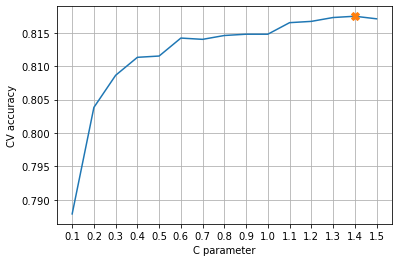

In [10]:
fig=plt.figure()
ax = fig.gca()
plt.plot(C2,cv.cv_results_["mean_test_score"])
ax.xaxis.set_major_locator(MultipleLocator(0.1))
plt.grid()
plt.plot(cv.best_params_["classifier__C"],cv.best_score_,marker="X",markersize=8)
plt.xlabel("C parameter")
plt.ylabel("CV accuracy")
print("The best parameters are:",cv.best_params_)
print("The CV score of this model is:",cv.best_score_)

In [11]:
model_l1 = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='saga', penalty='l1',C=1.4,max_iter=4000))])
model_l1.fit(X_train.iloc[small_df_indexes], y_train[small_df_indexes])
print("Train accuracy:", accuracy(y_train[small_df_indexes], model_l1.predict(X_train.iloc[small_df_indexes])))
cv_lasso = cross_val_score(model_l1, X_train.iloc[small_df_indexes], y_train[small_df_indexes], scoring=make_scorer(accuracy), cv=5, n_jobs=-1)
print("CV accuracy: ",np.mean(cv_lasso))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=1.4, max_iter=4000, penalty='l1',
                                    solver='saga'))])

Train accuracy: 0.852975047984645
CV accuracy:  0.8174664107485604


In [30]:
model_l1.named_steps["classifier"].coef_[1]

array([ 0.0927352 ,  0.50418519, -0.94537762,  0.        ,  0.4230076 ,
       -0.02925139,  0.67068708, -0.98076078,  0.19585349, -0.45100859,
        0.91016482,  0.28275812, -0.44325668,  0.6316734 , -0.06017766,
        0.26373518, -0.09975617,  0.56852215,  0.        ,  0.31295042,
        0.95581202,  0.07850542, -0.3611781 , -0.65135422,  0.88554726,
        0.37864194,  0.43453209,  1.48153494,  0.41384833, -0.12663399,
        0.25216565, -0.74496588, -0.03545022,  0.06997819,  0.13554268,
       -0.30635769, -0.70517996,  0.55846415,  0.34128875, -0.22042426,
       -0.42431439,  1.17242837, -0.67313067,  0.42673751,  0.28164039,
       -0.9343847 , -1.2268743 ,  0.        , -0.01201604,  0.44922073,
        0.63221577,  0.80248974,  0.56309468, -1.07018504,  0.66123376,
        0.02686129,  0.68016782,  0.46633486,  0.        , -0.05840908,
        0.49577662,  0.37191484, -0.58697397])

#### Ridge Logistic Regression

In [15]:
C2=np.arange(0.01, 2, 0.3)
model=Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='saga', penalty='l2',max_iter=4000))])

params = {'classifier__C': C2}
cv = GridSearchCV(model, params, refit=True, cv=5, n_jobs=-1,
                  verbose=False,
                  scoring=make_scorer(accuracy))
cv.fit(X_train.iloc[small_df_indexes], y_train[small_df_indexes])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=4000,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.01, 0.31, 0.61, 0.91, 1.21, 1.51, 1.81])},
             scoring=make_scorer(accuracy), verbose=False)

Done!


Text(0.5, 0, 'C parameter')

Text(0, 0.5, 'CV accuracy')

The best parameters are: {'classifier__C': 0.9099999999999999}
The CV score of this model is: 0.8203454894433782


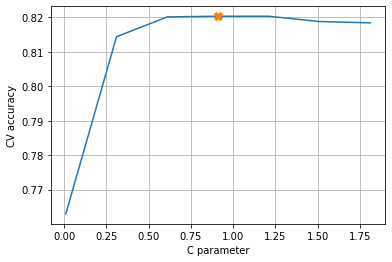

In [16]:
fig=plt.figure()
ax = fig.gca()
plt.plot(C2,cv.cv_results_["mean_test_score"])
#ax.xaxis.set_major_locator(MultipleLocator(0.1))
plt.grid()
plt.plot(cv.best_params_["classifier__C"],cv.best_score_,marker="X",markersize=8)
plt.xlabel("C parameter")
plt.ylabel("CV accuracy")
print("The best parameters are:",cv.best_params_)
print("The CV score of this model is:",cv.best_score_)

In [17]:
model_l2 = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='saga', penalty='l2',C=0.91,max_iter=4000))])

model_l2.fit(X_train.iloc[small_df_indexes],y_train[small_df_indexes])
print("Train accuracy:", accuracy(y_train[small_df_indexes], model_l2.predict(X_train.iloc[small_df_indexes])))
cv_ridge = cross_val_score(model_l2, X_train.iloc[small_df_indexes], y_train[small_df_indexes], scoring=make_scorer(accuracy), cv=5, n_jobs=-1)
print("CV accuracy: ",np.mean(cv_ridge))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.91, max_iter=4000, solver='saga'))])

Train accuracy: 0.8522072936660269
CV accuracy:  0.8203454894433782


In [31]:
model_l2.named_steps["classifier"].coef_[1]

array([ 0.18162059,  0.47227276, -0.90245305,  0.00615041,  0.48909032,
        0.17076142,  0.56721946, -0.79767897,  0.36600223, -0.36759571,
        0.87497277,  0.29731815, -0.31552354,  0.54557424, -0.25882125,
        0.37152086, -0.34817202,  0.44653666,  0.12982019,  0.3506273 ,
        0.93073962,  0.07701815, -0.38909955, -0.53119345,  0.89078714,
        0.3155088 ,  0.47347925,  1.53589492,  0.51922545, -0.1531033 ,
        0.23385087, -0.67308307, -0.14759775,  0.07948218,  0.11659786,
       -0.30362705, -0.77339001,  0.52297321,  0.37517524, -0.14786247,
       -0.40201177,  1.07643658, -0.59307905,  0.42043666,  0.36761826,
       -0.91433355, -1.05681333, -0.03724924, -0.01989565,  0.43479231,
        0.38341292,  0.70510049,  0.50502866, -0.90447004,  0.58341568,
       -0.05309509,  0.73892178,  0.48779168, -0.0083108 , -0.14466856,
        0.36093759,  0.40819147, -0.42835552])

In [35]:
(model_l2.named_steps["classifier"].coef_[1] - model_l1.named_steps["classifier"].coef_[1])/model_l2.named_steps["classifier"].coef_[1]

array([ 0.48940148, -0.06757203, -0.04756433,  1.        ,  0.13511353,
        1.17129974, -0.18241198, -0.22951816,  0.46488443, -0.22691474,
       -0.04022074,  0.0489712 , -0.4048292 , -0.15781384,  0.76749337,
        0.29012012,  0.71348596, -0.27318136,  1.        ,  0.10745563,
       -0.02693815, -0.01931066,  0.07175915, -0.22620905,  0.00588229,
       -0.20009947,  0.08225738,  0.03539303,  0.20295061,  0.17288531,
       -0.07831822, -0.10679634,  0.75981869,  0.11957388, -0.16247997,
       -0.0089934 ,  0.08819619, -0.06786378,  0.09032175, -0.49073835,
       -0.05547754, -0.08917552, -0.13497632, -0.01498644,  0.23387813,
       -0.0219298 , -0.16091864,  1.        ,  0.39604682, -0.03318462,
       -0.64891622, -0.13812109, -0.1149757 , -0.18321779, -0.13338359,
        1.50590901,  0.0795131 ,  0.04398767,  1.        ,  0.59625586,
       -0.37357989,  0.08887161, -0.37029626])

As we can see we have that some coefficents calculated by ridge and lasso are different, while there is a considerable number of coefficent that have a difference < 10%, suggesting that those estimates can be valid estimates.

Using lasso and ridge logistic regression has decreased the overfitting, we can see that because the CV accuracy is increased.

### Linear Discriminant Analysis

The linear discriminant analysis models the posterior probabilities as a linear function of x, but the relation is found through the Bayes Theorem.

LDA assumes that the density functions P(X|Y=k) of X in class K are distributed as a multivariate Gaussian, so first of all we check if this assumption is satisfied.

array([[<AxesSubplot:title={'center':'CUA'}>,
        <AxesSubplot:title={'center':'AGG'}>],
       [<AxesSubplot:title={'center':'UGA'}>,
        <AxesSubplot:title={'center':'AAG'}>],
       [<AxesSubplot:title={'center':'GAU'}>,
        <AxesSubplot:title={'center':'UGU'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'CUA'}>,
        <AxesSubplot:title={'center':'AGG'}>],
       [<AxesSubplot:title={'center':'UGA'}>,
        <AxesSubplot:title={'center':'AAG'}>],
       [<AxesSubplot:title={'center':'GAU'}>,
        <AxesSubplot:title={'center':'UGU'}>]], dtype=object)

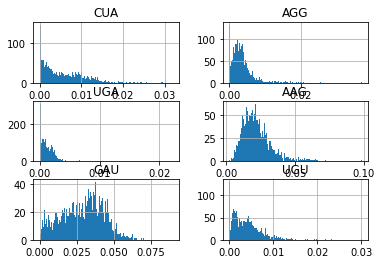

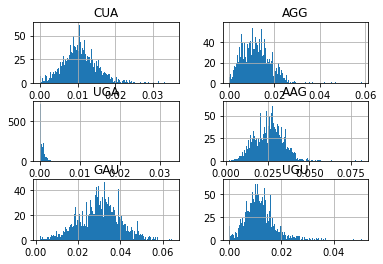

In [8]:
#calculated at preliminary analysis
most_important_feature = ['CUA', 'AGG', 'UGA', 'AAG', 'GAU', 'UGU']

df[df["Kingdom"] == "bct"].hist(column=most_important_feature, bins = 200)
df[df["Kingdom"] == "vrl"].hist(column=most_important_feature, bins = 200)

As we can see for some of the most important covariates the hypotesis of a posterior probability gaussian seems to be respected. However it seems that the covariance matrix is different between the classes, so we make the idea that QDA will perform quite better than LDA.

In [9]:
model = LDA()
model = model.fit(X_train, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X_train)))
cv_lda = cross_val_score(model, X_train, y_train, scoring=make_scorer(accuracy), cv=5,n_jobs=-1)
print("CV score:", np.mean(cv_lda))

Train accuracy: 0.7960084436768374
CV score: 0.7901543333471419


For LDA there are not shrinkage methods, so we proceed with feature selection in order to have a model with less covariates.

In [38]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_ff(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0,plot_results=True, 
               dummyModel = DummyRegressor,mod = LinearRegression,max_cov = 64,**kwargs):   # estimator and parameters
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    if plot_results==True:    
        plt.figure()
        candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    if(dummyModel == DummyClassifier):
        model = dummyModel(strategy = 'prior')
    else :
        model = dummyModel()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    if plot_results==True:
        _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    score_3=score
    dim=0
    if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, []))
            print("M{} CV score (2.): {}".format(dim, score_3))
        
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    nfeat = len(all_features)
    if nfeat > max_cov :
        nfeat = max_cov
    for dim in range(1,nfeat+1):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = mod(**kwargs)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
        if plot_results==True:
            
            _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        step3_score=score
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} CV score (3.): {}".format(dim, step3_score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    best_score = subsets_metric[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Score step: {}".format(best_score))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    if plot_results==True:
        best_candidate_score_idx = candidates_argbest(best_candidate_metric)
        _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
        _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
        candidate_fig.set_title(candidates_scorer_name)
        candidate_fig.legend()
    
        # Plot a figure to show how te 3. metric evolves
        plt.figure()
        subsets_fig = plt.subplot(111)
        _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
        _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
        subsets_fig.set_title(subsets_scorer_name)
        subsets_fig.legend()
    return(best_features,best_score,subsets_metric)

............
Best model (M0) with 0 features: []
M0 CV score (2.): 0.22414122444846427
............
Best model (M1) with 1 features: ['CUA']
M1 CV score (3.): 0.40184284050686514
............
Best model (M2) with 2 features: ['CUA', 'AGG']
M2 CV score (3.): 0.4890615722393295
............
Best model (M3) with 3 features: ['CUA', 'AGG', 'UGU']
M3 CV score (3.): 0.5355990370851111
............
Best model (M4) with 4 features: ['CUA', 'AGG', 'UGU', 'GAA']
M4 CV score (3.): 0.5606423268295153
............
Best model (M5) with 5 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU']
M5 CV score (3.): 0.5855894631703467
............
Best model (M6) with 6 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC']
M6 CV score (3.): 0.6114949115563595
............
Best model (M7) with 7 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU']
M7 CV score (3.): 0.6323167492877099
............
Best model (M8) with 8 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU']
M8 CV score (3.): 0.64690

............
Best model (M38) with 38 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 'GUA', 'CAG', 'UGC', 'CGU']
M38 CV score (3.): 0.7754748063353539
............
Best model (M39) with 39 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 'GUA', 'CAG', 'UGC', 'CGU', 'CGG']
M39 CV score (3.): 0.7775854863134445
............
Best model (M40) with 40 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 

............
Best model (M58) with 58 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 'GUA', 'CAG', 'UGC', 'CGU', 'CGG', 'CCA', 'GAC', 'CUC', 'AAC', 'Ncodons', 'AGU', 'GUU', 'CCU', 'CGC', 'CAA', 'CAC', 'GUG', 'CGA', 'GUC', 'GCU', 'UUU', 'GGU', 'UAG', 'UAA']
M58 CV score (3.): 0.7846853726232066
............
Best model (M59) with 59 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 'GUA', 'CAG', 'UGC', 'CGU', 'CGG', 'CCA', 'GAC', 'CUC', 'AAC', 'Ncodons', 'AGU', 'GUU', 'CCU', 'CGC', 'CAA', 'CAC', 'GUG', 'CGA', 'GUC', 'GCU', 'UUU', 'GGU', 'UAG', 'UAA', 'AAU']
M59 CV score (3.): 0.7854524825437155

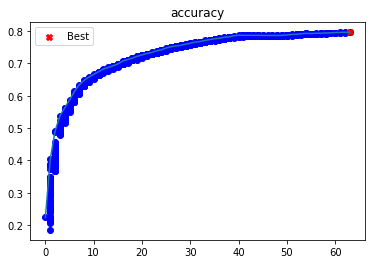

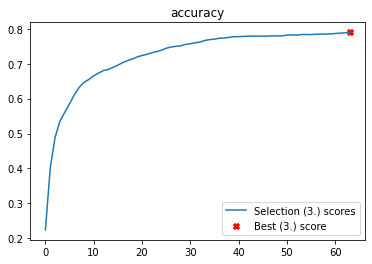

In [39]:
bf_lda,bscore,scores=forward_ff(X_train, y_train, X_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(accuracy), cv=5), np.argmax, # 3.
                  #get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="accuracy",
                  subsets_scorer_name="accuracy",
                  verbose=True,
                   dummyModel=DummyClassifier,mod=LDA)

The model that have the best CV accuracy is the model with all the features, which seems to be in accordance with the result obtained with the lasso regression, in which very few coefficent are put to 0.

### Polynomial LDA

In [40]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])
model = model.fit(X_train, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X_train)))
cv_lda = cross_val_score(model, X_train, y_train, scoring=make_scorer(accuracy), cv=5,n_jobs=-1)
print("CV score:", np.mean(cv_lda))

Train accuracy: 0.9714066398004222
CV score: 0.902130886461656


............
Best model (M0) with 0 features: []
M0 CV score (2.): 0.22418426103646832
............
Best model (M1) with 1 features: [712]
M1 CV score (3.): 0.44241842610364684
............
Best model (M2) with 2 features: [712, 195]
M2 CV score (3.): 0.527447216890595
............
Best model (M3) with 3 features: [712, 195, 1808]
M3 CV score (3.): 0.573704414587332
............
Best model (M4) with 4 features: [712, 195, 1808, 696]
M4 CV score (3.): 0.6021113243761997
............
Best model (M5) with 5 features: [712, 195, 1808, 696, 62]
M5 CV score (3.): 0.6282149712092131
............
Best model (M6) with 6 features: [712, 195, 1808, 696, 62, 684]
M6 CV score (3.): 0.6500959692898272
............
Best model (M7) with 7 features: [712, 195, 1808, 696, 62, 684, 1228]
M7 CV score (3.): 0.6660268714011516
............
Best model (M8) with 8 features: [712, 195, 1808, 696, 62, 684, 1228, 394]
M8 CV score (3.): 0.6777351247600768
............
Best model (M9) with 9 features: [712, 195, 1

............
Best model (M43) with 43 features: [712, 195, 1808, 696, 62, 684, 1228, 394, 677, 559, 576, 855, 625, 531, 1710, 728, 1119, 1177, 1925, 221, 401, 1269, 1501, 1637, 1303, 1311, 376, 2068, 464, 753, 1929, 1431, 495, 183, 914, 70, 230, 84, 703, 1905, 106, 85, 37]
M43 CV score (3.): 0.7804222648752399
............
Best model (M44) with 44 features: [712, 195, 1808, 696, 62, 684, 1228, 394, 677, 559, 576, 855, 625, 531, 1710, 728, 1119, 1177, 1925, 221, 401, 1269, 1501, 1637, 1303, 1311, 376, 2068, 464, 753, 1929, 1431, 495, 183, 914, 70, 230, 84, 703, 1905, 106, 85, 37, 154]
M44 CV score (3.): 0.7788867562380039
............
Best model (M45) with 45 features: [712, 195, 1808, 696, 62, 684, 1228, 394, 677, 559, 576, 855, 625, 531, 1710, 728, 1119, 1177, 1925, 221, 401, 1269, 1501, 1637, 1303, 1311, 376, 2068, 464, 753, 1929, 1431, 495, 183, 914, 70, 230, 84, 703, 1905, 106, 85, 37, 154, 466]
M45 CV score (3.): 0.779270633397313
............
Best model (M46) with 46 features: [7

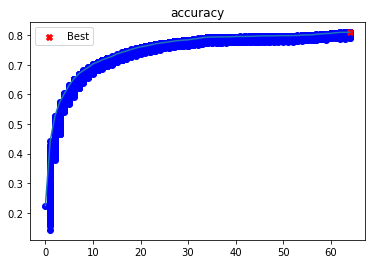

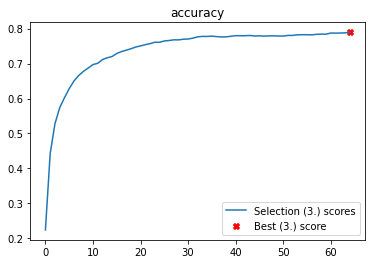

In [41]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly = poly.fit(X_train)

# Applies the transformation
X_train_poly = poly.transform(X_train)
X_train_poly = pd.DataFrame(X_train_poly)

bf_lda,bscore,scores=forward_ff(X_train_poly.iloc[small_df_indexes], y_train[small_df_indexes], X_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(accuracy), cv=5), np.argmax, # 3.
                  #get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="accuracy",
                  subsets_scorer_name="accuracy",
                  verbose=True,
                   dummyModel=DummyClassifier,mod=LDA, store_covariance=True)

### Quadratic Discriminant Analysis

QDA is a model which extend the LDA, by allowing that density functions (multivariate gaussians distributions) must have the same covariance matrix.

Since the gaussian hypotesis isn't right, we expect that this model doesn't perform really well. We procede with QDA and feature selection, in order to find the best model with QDA.

['CUA',
 'AGG',
 'CUU',
 'UGU',
 'UUC',
 'CUG',
 'GAA',
 'GCC',
 'CCC',
 'AAG',
 'ACU',
 'CGU',
 'UAU',
 'UAC',
 'CCA',
 'GGG',
 'GGA',
 'UCA',
 'CCU',
 'GAU',
 'AUC',
 'ACG',
 'UUG',
 'AUU',
 'GAG',
 'GUA',
 'AUA',
 'UCG',
 'GUC',
 'AAU',
 'CAC',
 'CGG',
 'CAU',
 'UGC',
 'GGC',
 'CCG',
 'AUG',
 'GCA',
 'AAA',
 'UCU',
 'CAG',
 'CGA',
 'UCC',
 'GUG',
 'GAC',
 'UGG',
 'UUA']

0.8332369958160152

[0.22414122444846427,
 0.43888054239909413,
 0.5216843185720138,
 0.5607368232093788,
 0.590483436667173,
 0.6155254376153587,
 0.6385530961027723,
 0.668393837712939,
 0.6872962896477445,
 0.7054315396051681,
 0.7178081718885927,
 0.7311452795537082,
 0.7411247508710882,
 0.750142964323359,
 0.7556119250472941,
 0.7621373304427476,
 0.7665505369217103,
 0.7741305458512269,
 0.7786404580749988,
 0.7835336030599704,
 0.7863160680668517,
 0.7918816424787234,
 0.7943766138720502,
 0.7980226644020676,
 0.80022963586904,
 0.8013807150057305,
 0.803587824558012,
 0.8088651228729109,
 0.8109759409363105,
 0.8128948204200555,
 0.8144303290572914,
 0.8150056384834551,
 0.8158695922340822,
 0.8162529630805911,
 0.8183639192292999,
 0.820666445730172,
 0.8235452482543716,
 0.8241210179648988,
 0.827479252682307,
 0.8286309301886705,
 0.8275749918299524,
 0.8295902548594523,
 0.8315095946275608,
 0.8326609039064333,
 0.8317012570365974,
 0.8306459630759884,
 0.8317015792356518,
 0.8332369958160152

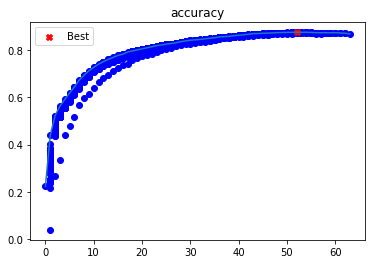

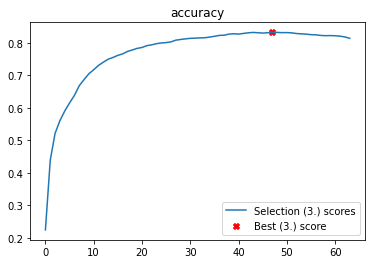

In [43]:
%%capture --no-stdout --no-display

bf_qda,bscore,scores=forward_ff(X_train, y_train, X_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(accuracy), cv=5), np.argmax, # 3.
                  candidates_scorer_name="accuracy",
                  subsets_scorer_name="accuracy",
                  verbose=False,
                   dummyModel=DummyClassifier,mod=QDA,store_covariance=True)
bf_qda
bscore
scores

In [44]:
len(bf_qda)

47

QDA perform better than LDA and use a model with less covariates, so it is preferable as we expected.

### K Nearest Neighbors

KNN is a non parametric method, so it doesn't have a training step. Since KNN have problems with highly dimensional data, first of all we try with all the features, then we try without the less important correlated features and finally with the best 15 principal component.

In [20]:
def show_results(cv, params, prefix=''):
    prefix = ' '+prefix    
    results = pd.DataFrame(cv.cv_results_)
    plt.plot(results[params], results['mean_test_score'], label=prefix)

    best_idx = np.argmax(results['mean_test_score'])
    plt.plot(results[params][best_idx], 
             results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV accuracy:",  cv.best_score_)


In [25]:
k=np.arange(1,40,1)
params = {'n_neighbors': k}
knn=KNeighborsClassifier()
cv = GridSearchCV(knn, params, scoring=make_scorer(accuracy), cv=5,verbose=False,n_jobs=-1)
cv = cv.fit(X_train, y_train)
print(cv.best_params_)
print("CV score", cv.best_score_)

{'n_neighbors': 9}
CV score 0.3560733601218833


We see that KNN with the covariates not standardized works really bad. My idea is because we have Ncodons which is responsable for a large part of the distance. So we decide to standardize the covariates. We will use the standard and the minmax scaler.

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('norm', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 50)},
             scoring=make_scorer(accuracy))

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('norm', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 50)},
             scoring=make_scorer(accuracy))

 Unnormalized (best 9) CV accuracy: 0.3560733601218833
 StandardScaler (best 3) CV accuracy: 0.8781404408882543
 MinMaxScaler (best 1) CV accuracy: 0.8787153364997986


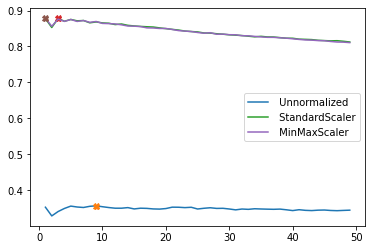

In [26]:
params = {'knn__n_neighbors': k}

model_std = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier())])
cv_std = GridSearchCV(model_std, params, refit=True, cv=5,
                     scoring=make_scorer(accuracy))
cv_std.fit(X_train, y_train)

model_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier())])
cv_minmax = GridSearchCV(model_minmax, params, refit=True, cv=5,
                        scoring=make_scorer(accuracy))
cv_minmax.fit(X_train, y_train)

show_results(cv, "param_n_neighbors", prefix="Unnormalized")
show_results(cv_std, 'param_knn__n_neighbors', "StandardScaler")
show_results(cv_minmax, 'param_knn__n_neighbors', "MinMaxScaler")

As we can see, scaling the covariates has a huge effect on the performance of KNN. Since we have used all the covariates there can be an overfitting situation, so now we try to reduce the number of covariates.

First of all we remove the less significative correlated covariates, with the MinMaxScaler.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('norm', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 50)},
             scoring=make_scorer(accuracy))

 MinMaxScaler (best 5) CV accuracy: 0.8267121427617982


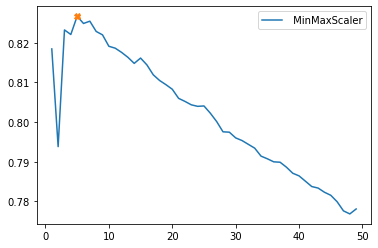

In [27]:
less_imp_corr_covs = {'UAU', 'CUG', 'AAU', 'GGC', 'UUC', 'GAG', 'GCC',
                      'ACA', 'GUC', 'GUG', 'UUA', 'AUU', 'CUA', 'CAG',
                      'AGU', 'CCG', 'GAA', 'ACG', 'CGG', 'UCG'}
less_imp_corr_covs.discard('ACA')
less_imp_corr_covs.discard('AGA')

model_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier())])
cv_minmax = GridSearchCV(model_minmax, params, refit=True, cv=5,
                        scoring=make_scorer(accuracy))
cv_minmax.fit(X_train.drop(less_imp_corr_covs, axis = 1), y_train)

show_results(cv_minmax, 'param_knn__n_neighbors', "MinMaxScaler")

By removing these covariates the CV accuracy is decreased of 5%.

We now try with the first 15 principal component. In order to do this we have to use the StandardScaler because PCA require standardize covariates.

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
X_pca = pca.fit(X_train_scaled)
X_prj = pca.fit_transform(X_train_scaled)

 MinMaxScaler (best 9) CV accuracy: 0.7735568013919


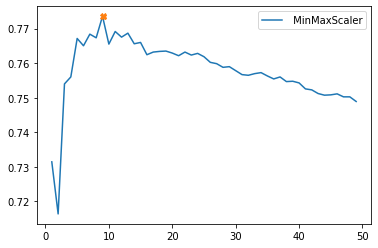

In [39]:
knn=KNeighborsClassifier()
params = {'n_neighbors': k}
cv = GridSearchCV(knn, params, scoring=make_scorer(accuracy), cv=5,verbose=False,n_jobs=-1)
cv = cv.fit(X_prj[:,0:15], y_train)
show_results(cv, 'param_n_neighbors', "MinMaxScaler")

Using only 15 principal component decrease CV accuracy by 10% respect to using all covariates, which is the best model that we found for now.

### Support Vector Machines

SVM is an incredibly powerful method, which find the hyperplane that best separate a class respect to the others. A very important feature is that we can transform our feature with kernel functions, in order to obtain classes linearly separable in other spaces. With the kernel trick we can work in the starting space and obtain result in projected space, saving a lot of time and memory.

In [20]:
train_sample=df.groupby("Kingdom").sample(frac=0.5,random_state=0)
y_sample=train_sample['Kingdom']
X_train_sample = train_sample.drop(['Kingdom','DNAtype','Ncodons'], axis=1)
X_train_sample.shape
y_sample.shape

(5210, 62)

(5210,)

#### Linear kernel

First of all, we try the linear kernel which is our starting space.

In [21]:
svm_model = svm.SVC(kernel='linear')
C = np.linspace(0.001, 500, 20)
params = {'C': C}
svm_linear_sm= GridSearchCV(svm_model, param_grid = params,
                        cv=5, scoring='accuracy', refit=True)
svm_linear_sm.fit(X_train_sample, y_sample)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-03, 2.63167368e+01, 5.26324737e+01, 7.89482105e+01,
       1.05263947e+02, 1.31579684e+02, 1.57895421e+02, 1.84211158e+02,
       2.10526895e+02, 2.36842632e+02, 2.63158368e+02, 2.89474105e+02,
       3.15789842e+02, 3.42105579e+02, 3.68421316e+02, 3.94737053e+02,
       4.21052789e+02, 4.47368526e+02, 4.73684263e+02, 5.00000000e+02])},
             scoring='accuracy')

{'C': 473.6842631578947}
0.8389635316698657


Text(0.5, 0, 'C')

Text(0.5, 1.0, 'SVM with linear kernel')

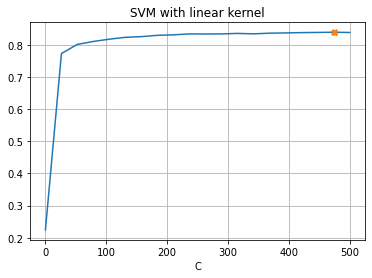

In [22]:
print(svm_linear_sm.best_params_)
print(svm_linear_sm.best_score_)
plt.plot(C,svm_linear_sm.cv_results_["mean_test_score"])
plt.plot(svm_linear_sm.best_params_['C'],svm_linear_sm.best_score_,marker='X')
plt.grid()
plt.xlabel("C")
plt.title("SVM with linear kernel")

In [23]:
# Polynomial
params = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [1,2,3]}
svm_poly = GridSearchCV(svm.SVC(kernel='poly'), params,
                        cv=5, scoring='accuracy', refit=True)
svm_poly.fit(X_train_sample, y_sample )

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [1, 2, 3]},
             scoring='accuracy')

{'C': 25.00075, 'coef0': 0.0, 'degree': 2}
0.8783109404990403


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

Text(0.5, 1.0, 'CV Accuracy for Coef0=0')

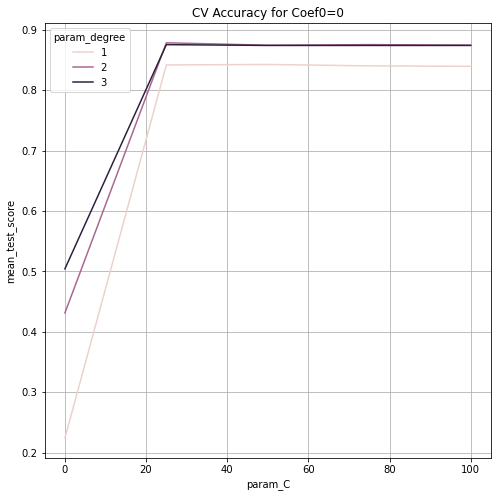

In [24]:
print(svm_poly.best_params_)
print(svm_poly.best_score_)
results=pd.DataFrame(svm_poly.cv_results_)
fig=plt.figure(figsize=(8,8))
plt.grid()
sns.lineplot(x=results[results["param_coef0"] == svm_poly.best_params_['coef0'] ]["param_C"],y=results[results["param_coef0"] == svm_poly.best_params_['coef0'] ]["mean_test_score"],hue=results["param_degree"],
            markers=True,dashes=False)
plt.title('CV Accuracy for Coef0=0')

In [25]:
# RBF
params = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
svm_rbf = GridSearchCV(svm.SVC(kernel='rbf'), params, 
                        cv=5, scoring='accuracy', refit=True)
svm_rbf.fit(X_train_sample, y_sample)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

{'C': 25.00075, 'gamma': 75.00025}
0.8965451055662188


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

Text(0.5, 1.0, 'CV Accuracy')

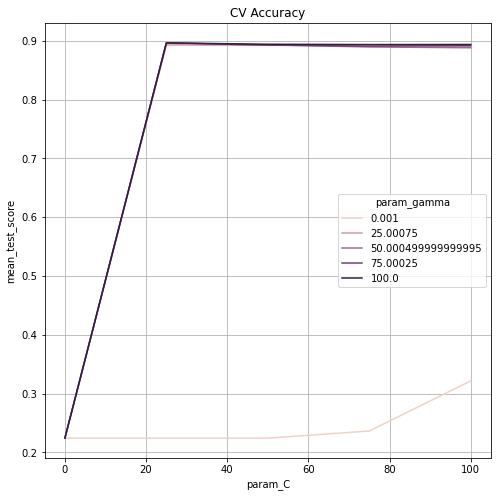

In [26]:
print(svm_rbf.best_params_)
print(svm_rbf.best_score_)
results=pd.DataFrame(svm_rbf.cv_results_)

fig=plt.figure(figsize=(8,8))
plt.grid()
sns.lineplot(x=results["param_C"],y=results["mean_test_score"],hue=results["param_gamma"],
            markers=True,dashes=False)
plt.title('CV Accuracy')

In [27]:
# Sigmoid
params = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}
svm_sigm = GridSearchCV(svm.SVC(kernel='sigmoid'), params, 
                         cv=5, scoring='accuracy', refit=True)
svm_sigm.fit(X_train_sample, y_sample)

GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

{'C': 100.0, 'coef0': -5.0, 'gamma': 100.0}
0.8589251439539348


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

Text(0.5, 1.0, 'CV Accuracy')

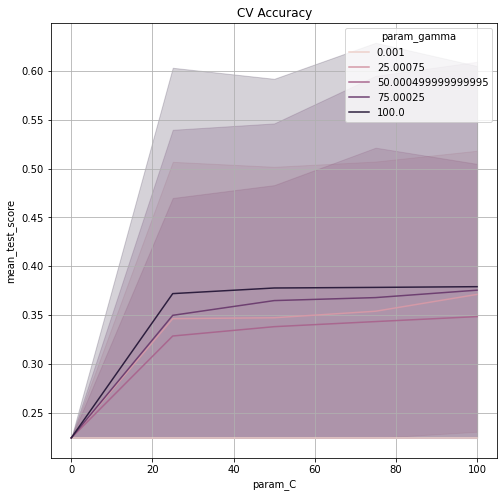

In [28]:
print(svm_sigm.best_params_)
print(svm_sigm.best_score_)
results=pd.DataFrame(svm_sigm.cv_results_)

fig=plt.figure(figsize=(8,8))
plt.grid()
sns.lineplot(x=results["param_C"],y=results["mean_test_score"],hue=results["param_gamma"],
            markers=True,dashes=False)
plt.title('CV Accuracy')

### Conclusion

As we can see the best model for classification is SVM with radial kernel and these parameters: C = 25.00075, gamma = 75.00025.

Now we refit the model with the complete dataset, and estimate the Test error in order to check how the model 

In [12]:
model = svm.SVC(kernel='rbf',C=25,gamma=75)
model.fit(X_train.drop("Ncodons", axis = 1), y_train)

print("Best Model train accuracy: ", accuracy(y_train, model.predict(X_train.drop("Ncodons", axis = 1))))
print("Best Model test accuracy: ", accuracy(y_test, model.predict(X_test.drop("Ncodons", axis = 1))))

SVC(C=25, gamma=75)

Best Model train accuracy:  0.9931874880061409
Best Model test accuracy:  0.9251726784343822


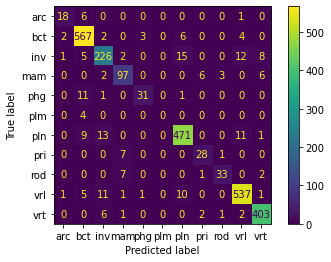

In [16]:
plot_confusion_matrix(model,X_test.drop("Ncodons", axis = 1),y_test)

In [20]:
%%capture --no-stdout --no-display
print(classification_report(y_test, model.predict(X_test.drop("Ncodons", axis = 1)), target_names=df["Kingdom"].unique()))

              precision    recall  f1-score   support

         vrl       0.82      0.72      0.77        25
         inv       0.93      0.97      0.95       584
         bct       0.87      0.84      0.85       269
         vrt       0.84      0.85      0.85       114
         pln       0.89      0.70      0.78        44
         arc       0.00      0.00      0.00         4
         rod       0.94      0.93      0.93       505
         mam       0.76      0.78      0.77        36
         phg       0.87      0.77      0.81        43
         pri       0.95      0.95      0.95       567
         plm       0.96      0.97      0.96       415

    accuracy                           0.93      2606
   macro avg       0.80      0.77      0.78      2606
weighted avg       0.92      0.93      0.92      2606



## Regression

We want to train a regressor to predict the values of the AGA and ACA features given the remaining ones.

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import t, f
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("train.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop("SpeciesID", inplace=True, axis=1)
df.drop("SpeciesName", inplace=True, axis=1)

X_train = df.drop(["DNAtype","AGA","ACA"], axis = 1)
y_train = df[["AGA","ACA"]]
X_train.shape
y_train.shape

(10422, 64)

(10422, 2)

First we visualize the correlation between AGA and ACA with the other covariates, in order to have an idea of which covariates are most important at least with a linear relationship.

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='AGA'>

<AxesSubplot:>

<AxesSubplot:ylabel='ACA'>

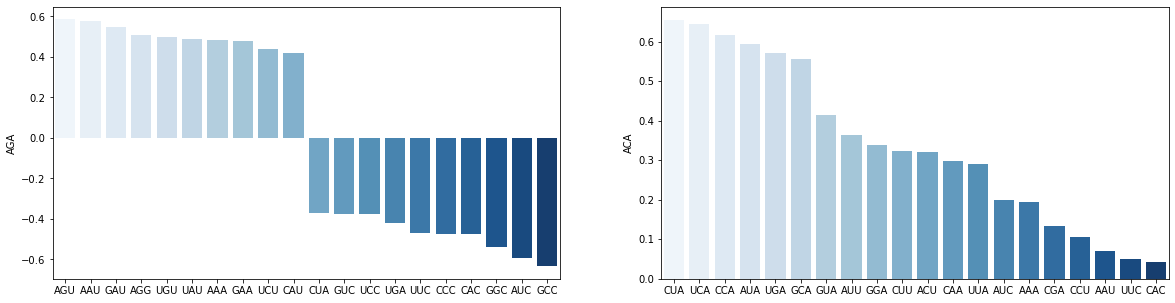

In [8]:
corr_AGA = []
corr_ACA = []
for cov in X_train.columns:
    corr_AGA.append(y_train["AGA"].corr(X_train[cov]))
    corr_ACA.append(y_train["ACA"].corr(X_train[cov]))
    
corr_df = pd.DataFrame(list(zip(corr_AGA, corr_ACA)), index=X_train.columns, columns =['AGA', 'ACA'])

corr_df.sort_values('AGA', inplace=True, ascending=False)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data = corr_df.iloc[[0,1,2,3,4,5,6,7,8,9,53,54,55,56,57,58,59,60,61,62],],
            x = corr_df.index[[0,1,2,3,4,5,6,7,8,9,53,54,55,56,57,58,59,60,61,62]],y = "AGA", palette = "Blues")

corr_df.sort_values('ACA', inplace=True, ascending=False)
plt.subplot(1,2,2)
sns.barplot(data = corr_df[0:20], x = corr_df.index[0:20],y = "ACA", palette = "Blues")


These are the covariates that have the bigger correlation with those two. As we can see there aren't many big value for correlation, so we might expect that the best models contains not too many covariates or that the relationship isn't linear.


Since the test set has no values of AGA and ACA to use for the testing phase, we will split the traning dataset into a train and test set.

In [4]:
mpg_test_size = 0.3
mpg_test_seed = 444
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=mpg_test_size, 
                                                    random_state=mpg_test_seed)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(7295, 64)

(3127, 64)

(7295, 2)

(3127, 2)

In [5]:
fraction = 0.5
small_df_indexes = []
seed = 44
for kingdom in df["Kingdom"].unique() :
    np.random.seed(seed)
    seed = seed + 1
    small_df_indexes.extend(
        np.random.choice(X_train[X_train["Kingdom"] == kingdom].index.values,
                         size = int(round(X_train[X_train["Kingdom"] == kingdom].index.values.size * fraction)), 
                         replace = False))
small_df_indexes = np.sort(np.array(small_df_indexes))

In [6]:
X_train = X_train.drop(["Kingdom"], axis = 1)
X_test = X_test.drop(["Kingdom"], axis = 1)

In [13]:
model = LinearRegression(fit_intercept=True)       
model.fit(X_train, y_train)                                    
y_predict_test = model.predict(X_test)  
y_predict_train = model.predict(X_train)

for i,cov in enumerate(y_train.columns):
    print(cov.upper())
    print("Train R2 score ", r2_score(y_train.iloc[:,i], y_predict_train[:,i]))
    print("Train MSE score ", mean_squared_error(y_train.iloc[:,i], y_predict_train[:,i]))
    print("Test R2 score ", r2_score(y_test.iloc[:,i], y_predict_test[:,i]))
    print("Test MSE score ", mean_squared_error(y_test.iloc[:,i], y_predict_test[:,i]))
    print()

LinearRegression()

AGA
Train R2 score  0.8047657296908045
Train MSE score  1.437361626077092e-05
Test R2 score  0.7991200594204377
Test MSE score  1.497557409351772e-05

ACA
Train R2 score  0.9162320071403047
Train MSE score  1.4373973725827528e-05
Test R2 score  0.9084067862877645
Test MSE score  1.4982628723379682e-05



The simple multivariate linear regression seems to perform well with ACA and less well with AGA.

Another important point is that there isn't pretty much difference between train and test metrics for evaluation of AGA and ACA.

After train the model we now test the significance for the coefficent, in order to see if there are some coefficent that are not significative, in order to cut them from the model and decrease the variance.

In [14]:
def rss(y_true, y_pred):
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

# Computes coefficient statistcs
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    #print("RSS: {}".format(RSS))
    
    return df
    
def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

In [37]:
for i,cov in enumerate(y_train.columns):
    print(cov.upper())
    betas = np.array([model.intercept_[i], *model.coef_[i]]).reshape(-1, 1)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        show_stats(X_train, y_train[cov].to_numpy(),
               betas, ['Intercept', *X_train.columns.values.tolist()],
               alpha=0.001)
    print()

AGA


,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,3.216931e-01,5.680165e-03,56.634464,0.000000e+00,True
1,Ncodons,2.437901e-11,6.734514e-11,0.362001,7.173618e-01,False
2,UUU,-3.246824e-01,6.844823e-03,-47.434733,0.000000e+00,True
3,UUC,-2.840137e-01,8.651399e-03,-32.828640,1.860176e-220,True
4,UUA,-2.761535e-01,7.759480e-03,-35.589180,8.820348e-256,True
5,UUG,-2.742986e-01,8.889674e-03,-30.855869,1.650060e-196,True
6,CUU,-3.769318e-01,8.404228e-03,-44.850262,0.000000e+00,True
7,CUC,-3.230897e-01,6.811638e-03,-47.432009,0.000000e+00,True
8,CUA,-4.007499e-01,8.256918e-03,-48.535052,0.000000e+00,True
9,CUG,-2.826372e-01,8.756562e-03,-32.277191,1.190388e-213,True



ACA


,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,6.783418e-01,5.680235e-03,119.421426,0.000000e+00,True
1,Ncodons,-2.430127e-11,6.734597e-11,-0.360842,7.182279e-01,False
2,UUU,-6.752944e-01,6.844908e-03,-98.656461,0.000000e+00,True
3,UUC,-7.160312e-01,8.651507e-03,-82.763763,0.000000e+00,True
4,UUA,-7.238983e-01,7.759577e-03,-93.290955,0.000000e+00,True
5,UUG,-7.256786e-01,8.889785e-03,-81.630619,0.000000e+00,True
6,CUU,-6.229799e-01,8.404332e-03,-74.126038,0.000000e+00,True
7,CUC,-6.768820e-01,6.811723e-03,-99.370162,0.000000e+00,True
8,CUA,-5.995242e-01,8.257020e-03,-72.607815,0.000000e+00,True
9,CUG,-7.173991e-01,8.756671e-03,-81.926008,0.000000e+00,True


As we can see the only feature for which we have no evidence to say that this features, alone, is correlated with the observation is Ncodons. We now try the same model without Ncodons.

In [38]:
model = LinearRegression(fit_intercept=True)       
model.fit(X_train.drop("Ncodons", axis = 1), y_train)                                    
y_predict_test = model.predict(X_test.drop("Ncodons", axis = 1))  
y_predict_train = model.predict(X_train.drop("Ncodons", axis = 1))

for i,cov in enumerate(y_train.columns):
    print(cov.upper())
    print("Train R2 score ", r2_score(y_train.iloc[:,i], y_predict_train[:,i]))
    print("Train MSE score ", mean_squared_error(y_train.iloc[:,i], y_predict_train[:,i]))
    print("Test R2 score ", r2_score(y_test.iloc[:,i], y_predict_test[:,i]))
    print("Test MSE score ", mean_squared_error(y_test.iloc[:,i], y_predict_test[:,i]))
    print()

LinearRegression()

AGA
Train R2 score  0.8047621920199737
Train MSE score  1.437387671260091e-05
Test R2 score  0.7991397991761947
Test MSE score  1.4974102497229545e-05

ACA
Train R2 score  0.9162304989561535
Train MSE score  1.4374232519175963e-05
Test R2 score  0.9084157502038696
Test MSE score  1.4981162424497188e-05



The results are not changed at all, so we keep this model without Ncodons and calculate the F-statistic, in order to check if the subset of all these features, combined, is informative to perform a good prediction.

In [15]:
alpha = 0.001
cov_list = X_train.columns.values.tolist()
cov_list.remove("Ncodons")
p_value, F = Ftest_restricted(X_train, y_train["AGA"], cov_list)

print("p-value =", p_value)
print("F-stat =", F)
if p_value < alpha:
    print("Reject H0: There evidence to say that at least one of the S features is useful")
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the S features is useful")

p-value = 0.0
F-stat = 480.595811184117
Reject H0: There evidence to say that at least one of the S features is useful


Now we try to run feature selection, in order to check if we can obtain best results with less covariates, reducing the variance of the model.

In [16]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_ff(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0,plot_results=True, 
               dummyModel = DummyRegressor,mod = LinearRegression,**kwargs):   # estimator and parameters
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    if plot_results==True:    
        plt.figure()
        candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    if(dummyModel == DummyClassifier):
        model = dummyModel(strategy = 'prior')
    else :
        model = dummyModel()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    if plot_results==True:
        _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    score_3=score
    dim=0
    if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, []))
            print("M{} CV score (2.): {}".format(dim, score_3))
        
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(1,len(all_features)+1):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = mod(**kwargs)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
        if plot_results==True:
            
            _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        step3_score=score
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} CV score (3.): {}".format(dim, step3_score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    best_score = subsets_metric[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Score step: {}".format(best_score))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    if plot_results==True:
        best_candidate_score_idx = candidates_argbest(best_candidate_metric)
        _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
        _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
        candidate_fig.set_title(candidates_scorer_name)
        candidate_fig.legend()
    
        # Plot a figure to show how te 3. metric evolves
        plt.figure()
        subsets_fig = plt.subplot(111)
        _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
        _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
        subsets_fig.set_title(subsets_scorer_name)
        subsets_fig.legend()
    return(best_features,best_score,subsets_metric)

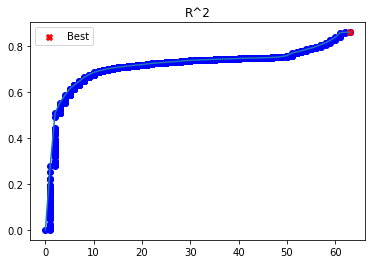

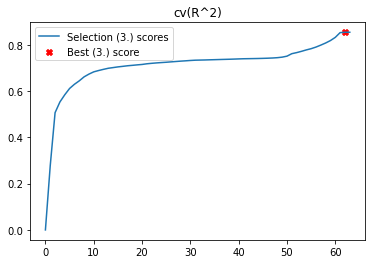

In [19]:
bf_linear,bscore,scores=forward_ff(X_train, y_train, X_test, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(r2_score), cv=5), np.argmax, # 3.
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="cv(R^2)",
                  verbose=False,
                   dummyModel=DummyRegressor,mod=LinearRegression,fit_intercept=True)

We see a strange behavior, because we have that after adding more or less 15 features, adding the other feature doesn't increase the CV accuracy, until we add the last 10/15 features, where it starts again to increase.

### Lasso Regression

Now we try the two shrinkage methods: lasso and ridge regression.

In [ ]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('regressor',Lasso())])
alphap=np.linspace(5e-5,0.01,11)
params = {'regressor__alpha': alphap}
cv = GridSearchCV(model, params, refit="MSE", cv=5, 
                  scoring={"R^2": make_scorer(r2_score,greater_is_better=True),
                          "MSE": make_scorer(mean_squared_error,greater_is_better=False)})
cv.fit(X_train, y_train)

In [ ]:
resLasso=pd.DataFrame(cv.cv_results_)
resLasso.sort_values(by="rank_test_MSE")[["param_regressor__alpha","mean_test_R^2","std_test_R^2","mean_test_MSE","std_test_MSE","rank_test_R^2","rank_test_MSE"]]

### Ridge Regression

In [ ]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('regressor',Ridge())])
alphap=np.linspace(5e-5,0.01,11)
params = {'regressor__alpha': alphap}
cv = GridSearchCV(model, params, refit="MSE", cv=5, 
                  scoring={"R^2": make_scorer(r2_score,greater_is_better=True),
                          "MSE": make_scorer(mean_squared_error,greater_is_better=False)})
cv.fit(X_train, y_train)

In [ ]:
resRidge=pd.DataFrame(cv.cv_results_)
resRidge.sort_values(by="rank_test_MSE")[["param_regressor__alpha","mean_test_R^2","std_test_R^2","mean_test_MSE","std_test_MSE","rank_test_R^2","rank_test_MSE"]]

### Polynomial regression

Now we transform the features using nonlinear (polynomial) function, in order to check if a more powerful model can obtain more robust results.

In [31]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly = poly.fit(X_train)

# Applies the transformation
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression(fit_intercept=True)           
model.fit(X_train_poly, y_train)
y_predict = model.predict(X_test_poly)

for i,cov in enumerate(y_train.columns):
    print(cov.upper())
    print("Test R2 score ", r2_score(y_test.iloc[:,i], y_predict[:,i]))
    print("Test MSE score ", mean_squared_error(y_test.iloc[:,i], y_predict[:,i]))
    print()

LinearRegression()

AGA
Test R2 score  0.5910379493699038
Test MSE score  3.0488069007678e-05

ACA
Test R2 score  0.5538910605279816
Test MSE score  7.297357893008441e-05



As we can see the R2 score decreased by that much, so clearly a polynomial regression with degree 2 isn't the best choice. Even trying degree = 3 give a worse result, so we do not take in account polynomial regression.

### KNN Regressor

Finally, we try a non parametric model for the regression, the KNN regression, which is similar to KNN classification. We try with all the covariates and then with the most important principal components.

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


model=KNeighborsRegressor(n_neighbors=5)
neigh2=np.arange(1,10,1)
params = [{"n_neighbors":neigh2,
          "weights":["uniform","distance"]}]
cv = GridSearchCV(model, params, refit="MSE", cv=5, 
                  scoring={"R^2": make_scorer(r2_score,greater_is_better=True),
                          "MSE": make_scorer(mean_squared_error,greater_is_better=False)},verbose=False,
                 n_jobs=-1)
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'weights': ['uniform', 'distance']}],
             refit='MSE',
             scoring={'MSE': make_scorer(mean_squared_error, greater_is_better=False),
                      'R^2': make_scorer(r2_score)},
             verbose=False)

,param_n_neighbors,param_weights,mean_test_R^2,std_test_R^2,mean_test_MSE,std_test_MSE,rank_test_R^2,rank_test_MSE
7,4,distance,0.796430,0.010424,-0.000024,0.000003,1,1
5,3,distance,0.795148,0.009175,-0.000025,0.000003,2,4
9,5,distance,0.794412,0.009387,-0.000025,0.000003,3,2
11,6,distance,0.793866,0.008211,-0.000025,0.000003,4,3
13,7,distance,0.792502,0.008086,-0.000025,0.000003,5,5
6,4,uniform,0.791963,0.010365,-0.000025,0.000003,6,6
4,3,uniform,0.791397,0.008814,-0.000025,0.000003,7,8
15,8,distance,0.790467,0.009047,-0.000025,0.000003,8,7
8,5,uniform,0.789433,0.009151,-0.000025,0.000003,9,9
10,6,uniform,0.788734,0.008150,-0.000025,0.000003,10,10


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_R^2'>

Text(0.5, 1.0, 'Scores')

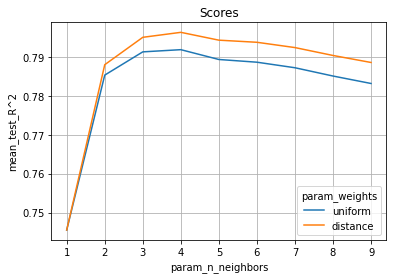

In [40]:
reskreg=pd.DataFrame(cv.cv_results_)[["param_n_neighbors","param_weights","mean_test_R^2","std_test_R^2","mean_test_MSE","std_test_MSE","rank_test_R^2","rank_test_MSE"]]
reskreg.sort_values(by="rank_test_R^2")
sns.lineplot(x=reskreg["param_n_neighbors"],y=reskreg["mean_test_R^2"],hue=reskreg["param_weights"],
            markers=True,dashes=False)
plt.grid()
plt.title("Scores")

The best result is obtained with distance weight and 4 nearest neighbors. Now we try with the most significative principal components.

In [41]:
pca = PCA()
X_pca = pca.fit(X_train_scaled)
X_prj = pca.fit_transform(X_train_scaled)


model=KNeighborsRegressor(n_neighbors=5)
neigh2=np.arange(1,10,1)
params = [{"n_neighbors":neigh2,
          "weights":["uniform","distance"]}]
cv = GridSearchCV(model, params, refit="MSE", cv=5, 
                  scoring={"R^2": make_scorer(r2_score,greater_is_better=True),
                          "MSE": make_scorer(mean_squared_error,greater_is_better=False)},verbose=False,
                 n_jobs=-1)
cv.fit(X_prj[:,0:30], y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'weights': ['uniform', 'distance']}],
             refit='MSE',
             scoring={'MSE': make_scorer(mean_squared_error, greater_is_better=False),
                      'R^2': make_scorer(r2_score)},
             verbose=False)

,param_n_neighbors,param_weights,mean_test_R^2,std_test_R^2,mean_test_MSE,std_test_MSE,rank_test_R^2,rank_test_MSE
9,5,distance,0.775678,0.010583,-0.000027,0.000003,1,1
11,6,distance,0.774613,0.010835,-0.000027,0.000003,2,2
7,4,distance,0.774440,0.010722,-0.000027,0.000003,3,4
13,7,distance,0.773943,0.010318,-0.000027,0.000003,4,3
15,8,distance,0.772486,0.009655,-0.000027,0.000003,5,5
8,5,uniform,0.771823,0.010559,-0.000027,0.000003,6,6
17,9,distance,0.771625,0.009866,-0.000027,0.000003,7,7
6,4,uniform,0.770944,0.010547,-0.000028,0.000003,8,9
10,6,uniform,0.770392,0.011011,-0.000027,0.000003,9,8
12,7,uniform,0.769549,0.010503,-0.000028,0.000003,10,10


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_R^2'>

Text(0.5, 1.0, 'Scores')

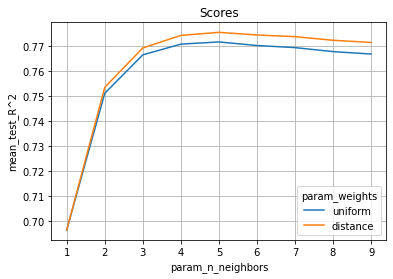

In [42]:
reskreg=pd.DataFrame(cv.cv_results_)[["param_n_neighbors","param_weights","mean_test_R^2","std_test_R^2","mean_test_MSE","std_test_MSE","rank_test_R^2","rank_test_MSE"]]
reskreg.sort_values(by="rank_test_R^2")
sns.lineplot(x=reskreg["param_n_neighbors"],y=reskreg["mean_test_R^2"],hue=reskreg["param_weights"],
            markers=True,dashes=False)
plt.grid()
plt.title("Scores")

It's better with all covariates.

### Conclusion

Surprisingly, the method which give us the best result is the linear regression with all the covariates.